# Using the Beta-VAE Model to generate digit images on the MNIST Dataset

## Abstract:
### In this work, the capabilities of Conditional Beta-Variational Autoencoders (Beta-VAEs) in generating digit images conditioned on specific classes using the MNIST dataset are explored. Beta-VAEs introduce a balancing term, Beta, to the traditional VAE loss function, controlling the trade-off between reconstruction fidelity and latent space regularization. Various Beta values are experimented with to observe how they influence the model's ability to reconstruct and generate new digit images. The results provide insights into the optimal settings for the Beta parameter in Conditional VAEs, revealing potential pathways for enhancing model performance in digit image generation tasks.

## Table of Contents:
#### Imports and Setup

1. Importing libraries, preprocessing the data, augmenting the data, and then displaying the first batch of the data
2. Setting up data transforms
3. ConditionalBetaVAE Class
4. Definition of the Conditional Beta VAE model class
5. Implementation of encode, reparameterize, decode, and forward methods
6. Loss Function:
Definition of the VAE loss function (ELBO), combining MSE and KL divergence

#### Visualization Functions:
* visualize_samples: Visualize generated samples given a condition
* visualize_latent_space using t-SNE: Visualizing the latent representations of data
* visualize_pca: Visualizing the latent representations using PCA
Training Functions
* train_model_conditional: Training the Conditional Beta VAE model with varying beta values
* train_model_conditional_bestparam: Training with the best beta parameter found

#### Helper functions for training process visualization after each epoch
* Finding the Best Beta: find_best_beta: Find the beta value that leads to the lowest final average loss
* Main Training Sequence
* Loading the MNIST dataset
* Training the model with different beta values
* Identifying the best beta value and retraining the model
* Extracting latent representations

## Introduction:
#### Variational Autoencoders (VAEs) have been widely recognized for their efficiency in generating high-quality images, learning compact latent representations, and their applicability in various domains, including image generation, anomaly detection, and more. The introduction of the Beta-VAE model extends the traditional VAE framework by adding a tunable parameter, Beta ((\beta)), which balances the reconstruction loss and the Kullback-Leibler (KL) divergence in the model's loss function. This balance is crucial for the learning of disentangled and meaningful latent representations.

Conditional VAEs further extend this by incorporating label information into the model, allowing for controlled generation of data instances based on specified conditions. In the realm of digit generation, this means creating images of digits conditioned on the digit class, offering a direct pathway to investigate how different aspects of the data distribution can be captured and manipulated by the model.

The experiment utilizes the MNIST dataset, a staple in machine learning for handwritten digit recognition tasks, composed of 60,000 training images and 10,000 test images. A Conditional Beta-VAE model is designed that embeds class labels into both the encoder and decoder phases, enabling the model to learn class-specific features in its latent space.

A systematic exploration of the Beta parameter's impact on model performance is conducted, specifically looking at the reconstruction quality and the diversity of generated images. By employing a range of Beta values and evaluating model performance through qualitative and quantitative metrics, the aim is to uncover the relationship between the Beta parameter and the Conditional Beta-VAE's ability to generate distinct digit images.

This study contributes to the ongoing discussion about the importance of model hyperparameters in generative models and offers guidelines for configuring Conditional Beta-VAEs for digit image generation tasks. The findings suggest that an optimal balance between reconstruction accuracy and KL divergence, modulated by the Beta parameter, is crucial for achieving high-quality, diverse digit generation.

## Method:
#### Dataset Preparation
The MNIST dataset, consisting of 60,000 28x28 grayscale images of handwritten digits (0 through 9), split into training and test sets, is employed. The images are transformed into tensors and normalized to a range of [-1, 1] to suit the model input requirements.

#### Model Architecture
The Conditional Beta-VAE model comprises a conditional encoder and decoder that utilize class labels alongside images to improve the generation process. The encoder and decoder are constructed with fully connected layers, batch normalization, and ReLU activations. The model produces a latent representation of size 20 for each input image, combined with a class label encoded by an embedding layer.

#### Training Procedure
Training is conducted over 10 epochs for each beta parameter setting ((\beta = 0.5, 1, 2, 4, 8)), using an AdamW optimizer with a learning rate of (1 \times 10^{-3}). The loss function includes both the MSE for reconstruction and the KL divergence, weighted by the beta parameter. Performance metrics, including average loss, MSE, and KLD, are recorded for each epoch.

#### Beta Parameter Exploration
The beta parameter is systematically varied from 0.5 to 8 to observe its impact on the Conditional Beta-VAE's performance. The exploration aims to find an optimal beta value that achieves a balance between high-quality image reconstruction and a well-structured latent space. Once the best beta parameter is obtained, the machine is trained with the best beta parameter for 50 epochs.

#### Evaluation Metrics and Visualization
Model performance is visually evaluated by comparing original and reconstructed images at the end of specified epochs. Further, the latent space representations learned by the model are visualized using t-SNE and PCA, illustrating how the model organizes data points in the latent space according to digit class.


## Importing libraries, preprocessing the data, augmenting the data and then displaying the first batch of the data

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15931289.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 475935.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4368216.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5217893.39it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



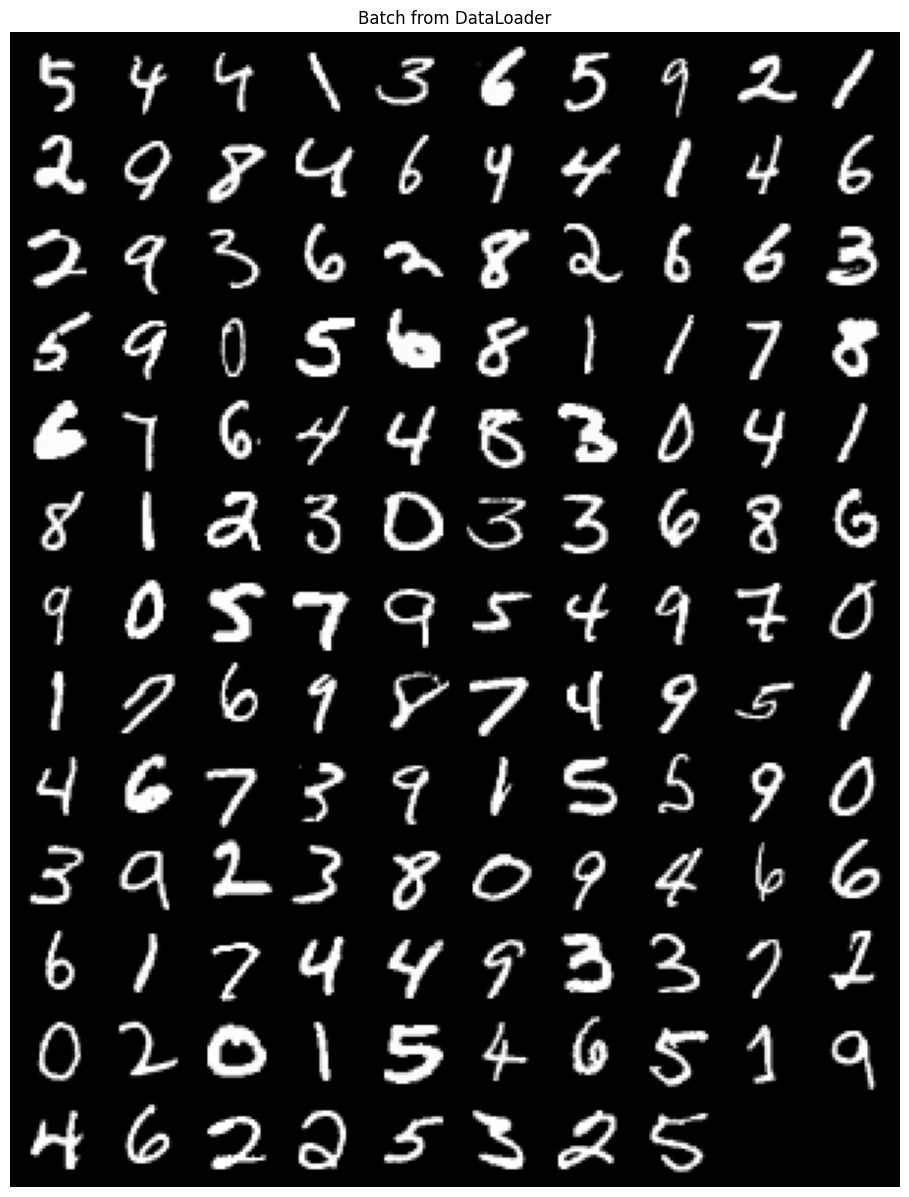

Labels: [5 4 4 1 3 6 5 9 2 1 2 9 8 4 6 4 4 1 4 6 2 9 3 6 2 8 2 6 6 3 5 9 0 5 6 8 1
 1 7 8 6 7 6 4 4 8 3 0 4 1 8 1 2 3 0 3 3 6 8 6 9 0 5 7 9 5 4 9 7 0 1 7 6 9
 8 7 4 9 5 1 4 6 7 3 9 1 5 5 9 0 3 9 2 3 8 0 9 4 6 6 6 1 7 4 4 9 3 3 7 2 0
 2 0 1 5 4 6 5 1 9 4 6 2 2 5 3 2 5]


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

# Define the transform for the dataset.
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Load the MNIST dataset with the defined transform.
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

def show_batch(train_loader):
    # Fetch the first batch of images and labels
    images, labels = next(iter(train_loader))

    # Make a grid from batch
    img_grid = utils.make_grid(images, nrow=10)  # nrow is the number of images displayed in a row

    # Convert to numpy for display
    img_grid = np.transpose(img_grid.numpy(), (1, 2, 0))

    # Plotting
    plt.figure(figsize=(15, 15))
    plt.imshow(img_grid)
    plt.title('Batch from DataLoader')
    plt.axis('off')
    plt.show()

    # Print the labels for the batch
    print('Labels:', labels.numpy())

show_batch(train_loader)



## ConditionBetaVAE set up for layers and training

In [2]:
class ConditionalBetaVAE(nn.Module):
    def __init__(self, z_dim=20, hidden_dim=1024, num_classes=10):
        super(ConditionalBetaVAE, self).__init__()
        self.z_dim = z_dim
        self.num_classes = num_classes
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.enc = nn.Sequential(
            nn.Linear(784 + num_classes, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, z_dim * 2)
        )

        self.dec = nn.Sequential(
            nn.Linear(z_dim + num_classes, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 784),
            nn.Sigmoid()
        )

    def encode(self, x, labels):
        labels = self.label_emb(labels)
        combined = torch.cat([x.view(-1, 784), labels], dim=1)
        h = self.enc(combined)
        return h[:, :self.z_dim], h[:, self.z_dim:]

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, labels):
        labels = self.label_emb(labels)
        combined = torch.cat([z, labels], dim=1)
        return self.dec(combined)

    def forward(self, x, labels):
        mu, log_var = self.encode(x, labels)
        z = self.reparameterize(mu, log_var)
        return self.decode(z, labels), mu, log_var

## Setting up a loss function for the model

In [3]:
def vae_loss(recon_x, x, mu, log_var, beta=1):
    MSE = F.mse_loss(recon_x.view(-1, 784), x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return MSE + beta * KLD, MSE, KLD

## Defining a visualize samples function to show Original image and Reconstructed image per epoch based on the interval set on the main function

In [4]:
# Implement the missing visualize_samples function.
def visualize_samples(model, device, num_samples=10, condition=0):
    model.eval()
    with torch.no_grad():
        labels = torch.LongTensor([condition] * num_samples).to(device)  # Prepare fixed labels for all samples
        z = torch.randn(num_samples, model.z_dim).to(device)  # Generate random latent vectors
        samples = model.decode(z, labels)  # Decode the latent vectors using the model

        samples = samples.view(-1, 28, 28).cpu().numpy()  # Reshape for visualization
        fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
        for i, ax in enumerate(axes):
            ax.imshow(samples[i], cmap='gray')
            ax.axis('off')
        plt.show()
transform = transforms.Compose([
    transforms.ToTensor(),
])

## Defining a function for training data with the model and visualization during training

In [5]:
def train_model_conditional(model, dataloader, device, epochs=10, beta=1, visualization_interval=5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    model.train()

    losses = []
    mse_losses = []
    kld_losses = []

    for epoch in range(epochs):
        total_loss, total_mse, total_kld = 0, 0, 0
        for i, (images, labels) in enumerate(dataloader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            recon_images, mu, log_var = model(images, labels)
            loss, mse_loss, kld_loss = vae_loss(recon_images, images, mu, log_var, beta=beta)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mse += mse_loss.item()
            total_kld += kld_loss.item()

            if i % 100 == 0:
                print(f"Epoch {epoch} | Iteration {i} | Loss {loss.item()} | MSE {mse_loss.item()} | KLD {kld_loss.item()}")

        if epoch % visualization_interval == 0 or epoch == epochs - 1:
            with torch.no_grad():
                model.eval()
                sample_images, sample_labels = next(iter(dataloader))
                sample_images, sample_labels = sample_images.to(device), sample_labels.to(device)
                reconstructed, _, _ = model(sample_images[:10], sample_labels[:10])
                fig, ax = plt.subplots(2, 10, figsize=(20, 4))
                for k in range(10):
                    ax[0, k].imshow(sample_images[k].squeeze().cpu().numpy().reshape(28, 28), cmap='gray')
                    ax[0, k].set_title(f"Original {sample_labels[k].item()}")
                    ax[1, k].imshow(reconstructed[k].squeeze().cpu().numpy().reshape(28, 28), cmap='gray')
                    ax[1, k].set_title(f"Recons {sample_labels[k].item()}")
                plt.show()
                model.train()

        average_loss = total_loss / len(dataloader)
        average_mse = total_mse / len(dataloader)
        average_kld = total_kld / len(dataloader)
        print(f"Epoch {epoch} | Average Loss: {average_loss} | Average MSE: {average_mse} | Average KLD: {average_kld}")
        losses.append(average_loss)
        mse_losses.append(average_mse)
        kld_losses.append(average_kld)
        scheduler.step()

    return losses, mse_losses, kld_losses



## Training and testing batch seperation with multiple beta values

### With this we also set certain beta values and try to find the best beta value for the machine we are training we also show visualisation per epcoch long with Loss, KLD Loss and MSE and we compare the ELBO loss that changes based on the beta parameter

Training with beta = 0.5
Epoch 0 | Iteration 0 | Loss 24680.724609375 | MSE 24507.05078125 | KLD 347.34771728515625
Epoch 0 | Iteration 100 | Loss 3546.7265625 | MSE 2807.103271484375 | KLD 1479.246337890625
Epoch 0 | Iteration 200 | Loss 3294.1123046875 | MSE 2494.84228515625 | KLD 1598.540283203125
Epoch 0 | Iteration 300 | Loss 3227.052734375 | MSE 2328.3857421875 | KLD 1797.334228515625
Epoch 0 | Iteration 400 | Loss 2916.322265625 | MSE 2013.487060546875 | KLD 1805.670166015625


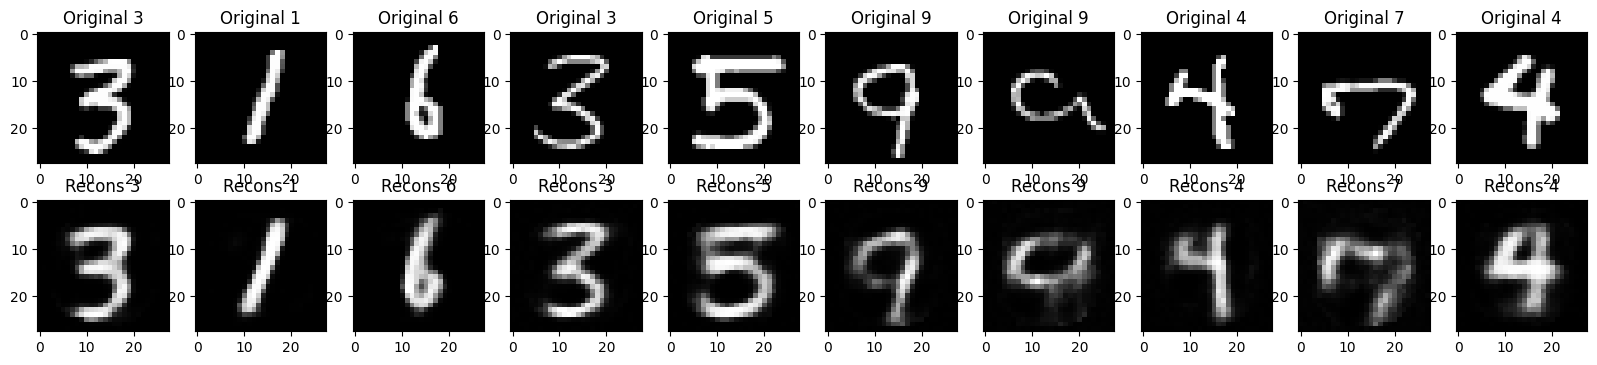

Epoch 0 | Average Loss: 3617.0879442422374 | Average MSE: 2828.1542154080325 | Average KLD: 1577.8674657370236
Epoch 1 | Iteration 0 | Loss 3011.03271484375 | MSE 2092.94140625 | KLD 1836.182861328125
Epoch 1 | Iteration 100 | Loss 2722.16357421875 | MSE 1792.3687744140625 | KLD 1859.5897216796875
Epoch 1 | Iteration 200 | Loss 3122.6884765625 | MSE 2190.117919921875 | KLD 1865.14111328125
Epoch 1 | Iteration 300 | Loss 2832.26171875 | MSE 1910.7685546875 | KLD 1842.9864501953125
Epoch 1 | Iteration 400 | Loss 2743.86279296875 | MSE 1809.6329345703125 | KLD 1868.459716796875
Epoch 1 | Average Loss: 2881.7696900194896 | Average MSE: 1950.8954138521956 | Average KLD: 1861.7485564990338
Epoch 2 | Iteration 0 | Loss 2830.12841796875 | MSE 1880.9525146484375 | KLD 1898.351806640625
Epoch 2 | Iteration 100 | Loss 2847.625 | MSE 1883.36279296875 | KLD 1928.524658203125
Epoch 2 | Iteration 200 | Loss 2789.151123046875 | MSE 1857.5987548828125 | KLD 1863.104736328125
Epoch 2 | Iteration 300 | L

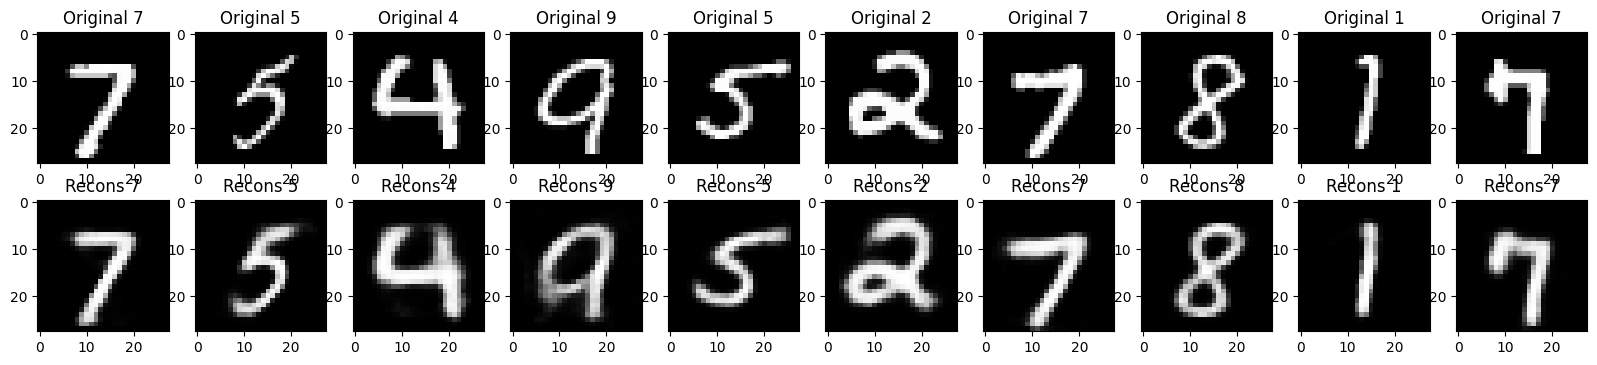

Epoch 5 | Average Loss: 2557.211846910814 | Average MSE: 1591.004687604111 | Average KLD: 1932.4143050789578
Epoch 6 | Iteration 0 | Loss 2451.375 | MSE 1502.998291015625 | KLD 1896.7535400390625
Epoch 6 | Iteration 100 | Loss 2564.345703125 | MSE 1592.863525390625 | KLD 1942.9644775390625
Epoch 6 | Iteration 200 | Loss 2542.772216796875 | MSE 1567.0859375 | KLD 1951.3724365234375
Epoch 6 | Iteration 300 | Loss 2593.230224609375 | MSE 1596.174560546875 | KLD 1994.111328125
Epoch 6 | Iteration 400 | Loss 2473.608642578125 | MSE 1487.2379150390625 | KLD 1972.741455078125
Epoch 6 | Average Loss: 2526.627859933036 | Average MSE: 1558.2035367595615 | Average KLD: 1936.8486429633363
Epoch 7 | Iteration 0 | Loss 2620.189208984375 | MSE 1649.7052001953125 | KLD 1940.968017578125
Epoch 7 | Iteration 100 | Loss 2464.938232421875 | MSE 1491.285400390625 | KLD 1947.3057861328125
Epoch 7 | Iteration 200 | Loss 2449.736083984375 | MSE 1501.74267578125 | KLD 1895.9869384765625
Epoch 7 | Iteration 300

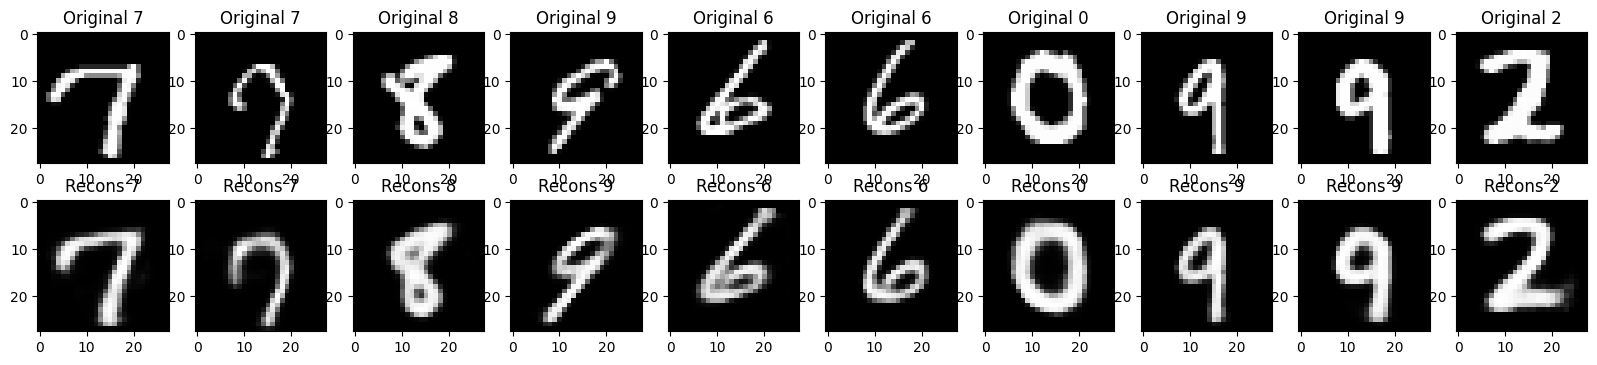

Epoch 9 | Average Loss: 2450.1357531191697 | Average MSE: 1479.1706188990872 | Average KLD: 1941.930270782666
Training with beta = 1
Epoch 0 | Iteration 0 | Loss 24583.099609375 | MSE 24229.658203125 | KLD 353.4422607421875
Epoch 0 | Iteration 100 | Loss 4241.20068359375 | MSE 3573.40771484375 | KLD 667.79296875
Epoch 0 | Iteration 200 | Loss 3939.80810546875 | MSE 3086.24658203125 | KLD 853.5614013671875
Epoch 0 | Iteration 300 | Loss 3927.563232421875 | MSE 3001.24169921875 | KLD 926.3214721679688
Epoch 0 | Iteration 400 | Loss 3917.69384765625 | MSE 2926.1328125 | KLD 991.5610961914062


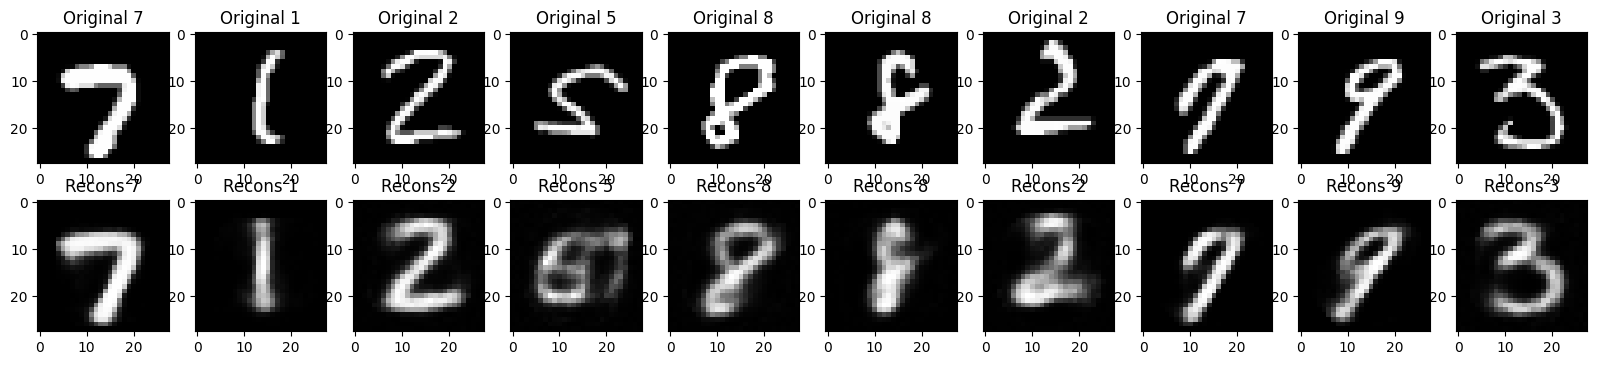

Epoch 0 | Average Loss: 4329.670532486841 | Average MSE: 3521.574731757646 | Average KLD: 808.0958044381538
Epoch 1 | Iteration 0 | Loss 3913.064697265625 | MSE 2934.657470703125 | KLD 978.4072265625
Epoch 1 | Iteration 100 | Loss 3812.549072265625 | MSE 2773.97802734375 | KLD 1038.571044921875
Epoch 1 | Iteration 200 | Loss 3773.02294921875 | MSE 2750.08349609375 | KLD 1022.939453125
Epoch 1 | Iteration 300 | Loss 3630.713134765625 | MSE 2595.553466796875 | KLD 1035.15966796875
Epoch 1 | Iteration 400 | Loss 3638.38037109375 | MSE 2573.500732421875 | KLD 1064.8795166015625
Epoch 1 | Average Loss: 3650.5355893523456 | Average MSE: 2645.7608999158783 | Average KLD: 1004.7746919091068
Epoch 2 | Iteration 0 | Loss 3465.13525390625 | MSE 2448.546630859375 | KLD 1016.5885009765625
Epoch 2 | Iteration 100 | Loss 3539.2880859375 | MSE 2511.991943359375 | KLD 1027.2960205078125
Epoch 2 | Iteration 200 | Loss 3503.874267578125 | MSE 2491.3154296875 | KLD 1012.558837890625
Epoch 2 | Iteration 30

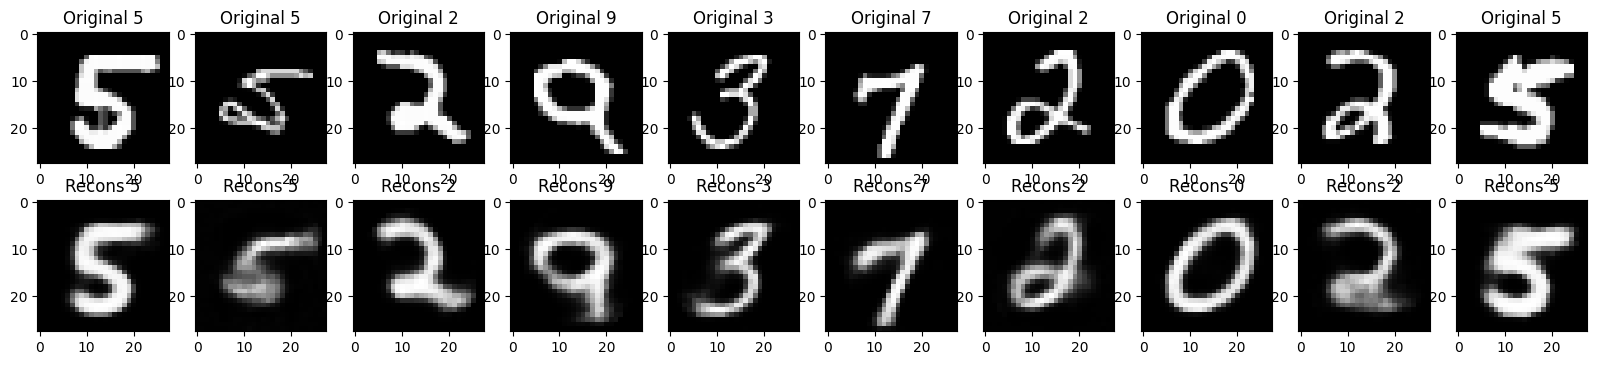

Epoch 5 | Average Loss: 3297.7394780075624 | Average MSE: 2191.417378960388 | Average KLD: 1106.3220976156467
Epoch 6 | Iteration 0 | Loss 3232.796142578125 | MSE 2144.823974609375 | KLD 1087.97216796875
Epoch 6 | Iteration 100 | Loss 3209.1220703125 | MSE 2130.29736328125 | KLD 1078.8245849609375
Epoch 6 | Iteration 200 | Loss 3158.9267578125 | MSE 2060.18115234375 | KLD 1098.74560546875
Epoch 6 | Iteration 300 | Loss 3173.46337890625 | MSE 2043.3074951171875 | KLD 1130.15576171875
Epoch 6 | Iteration 400 | Loss 3310.4013671875 | MSE 2228.526611328125 | KLD 1081.874755859375
Epoch 6 | Average Loss: 3261.11006681853 | Average MSE: 2143.431761914479 | Average KLD: 1117.6783043834955
Epoch 7 | Iteration 0 | Loss 3293.778076171875 | MSE 2116.673828125 | KLD 1177.104248046875
Epoch 7 | Iteration 100 | Loss 3167.483642578125 | MSE 2054.056640625 | KLD 1113.427001953125
Epoch 7 | Iteration 200 | Loss 3306.8876953125 | MSE 2154.158203125 | KLD 1152.7294921875
Epoch 7 | Iteration 300 | Loss 31

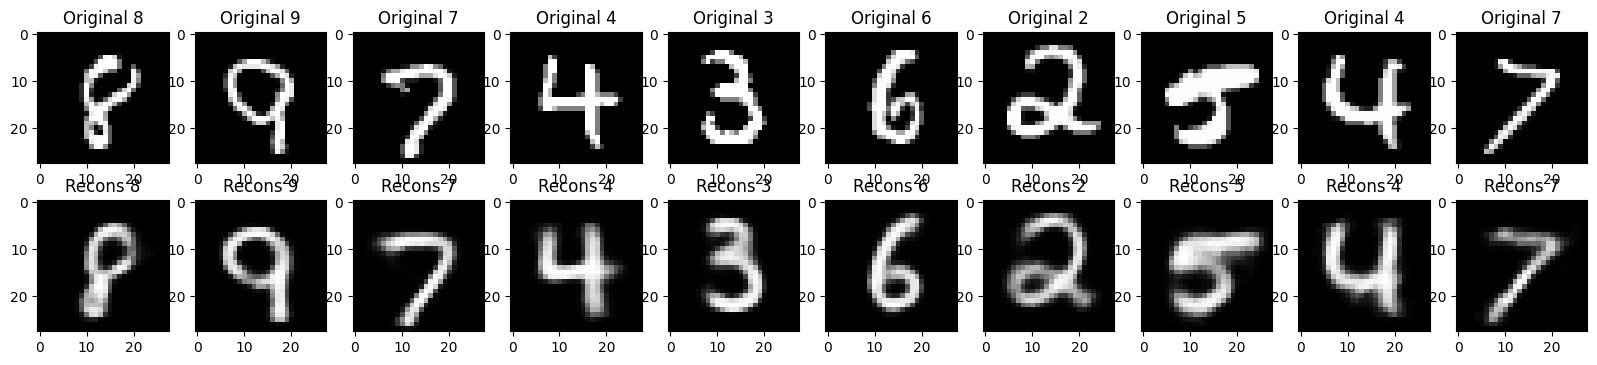

Epoch 9 | Average Loss: 3183.0737367154184 | Average MSE: 2045.1828652322927 | Average KLD: 1137.890872654376
Training with beta = 2
Epoch 0 | Iteration 0 | Loss 25038.73828125 | MSE 24448.68359375 | KLD 295.02703857421875
Epoch 0 | Iteration 100 | Loss 5022.2109375 | MSE 4534.27099609375 | KLD 243.9700927734375
Epoch 0 | Iteration 200 | Loss 4720.4794921875 | MSE 4041.2861328125 | KLD 339.5968017578125
Epoch 0 | Iteration 300 | Loss 4564.64990234375 | MSE 3794.1298828125 | KLD 385.2600402832031
Epoch 0 | Iteration 400 | Loss 4743.306640625 | MSE 3923.485107421875 | KLD 409.91070556640625


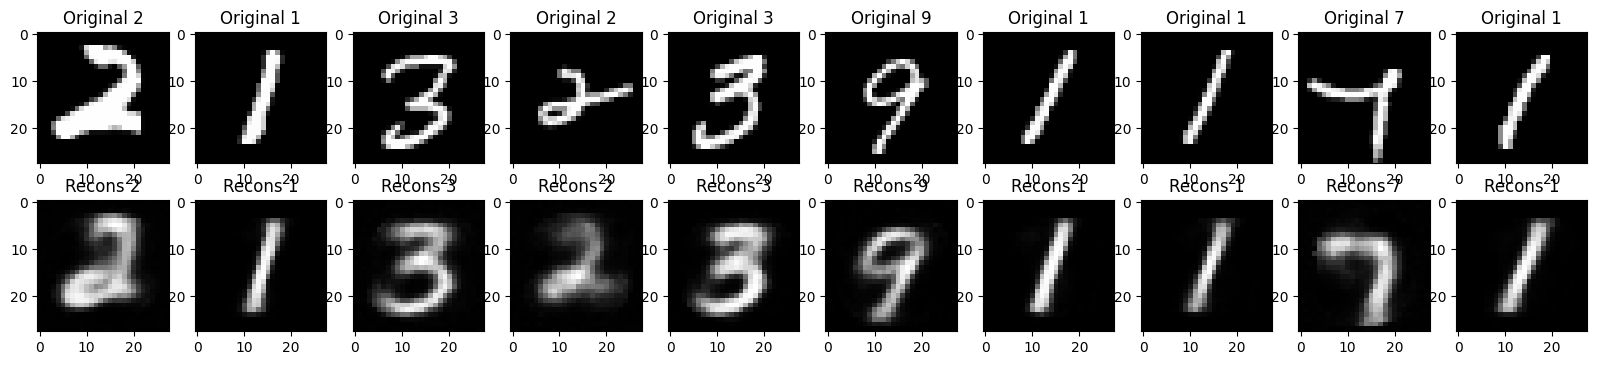

Epoch 0 | Average Loss: 4972.9600973230945 | Average MSE: 4303.60488833039 | Average KLD: 334.67760130794824
Epoch 1 | Iteration 0 | Loss 4415.76123046875 | MSE 3633.41162109375 | KLD 391.1748352050781
Epoch 1 | Iteration 100 | Loss 4276.42724609375 | MSE 3473.392578125 | KLD 401.51727294921875
Epoch 1 | Iteration 200 | Loss 4270.26513671875 | MSE 3399.153076171875 | KLD 435.5560607910156
Epoch 1 | Iteration 300 | Loss 4369.28515625 | MSE 3438.478515625 | KLD 465.40338134765625
Epoch 1 | Iteration 400 | Loss 4643.1162109375 | MSE 3744.316650390625 | KLD 449.39984130859375
Epoch 1 | Average Loss: 4391.494010486074 | Average MSE: 3499.085440369303 | Average KLD: 446.20428382206575
Epoch 2 | Iteration 0 | Loss 4472.0732421875 | MSE 3604.453857421875 | KLD 433.809814453125
Epoch 2 | Iteration 100 | Loss 4336.154296875 | MSE 3373.42236328125 | KLD 481.3660888671875
Epoch 2 | Iteration 200 | Loss 4026.164306640625 | MSE 3091.543701171875 | KLD 467.3102722167969
Epoch 2 | Iteration 300 | Loss

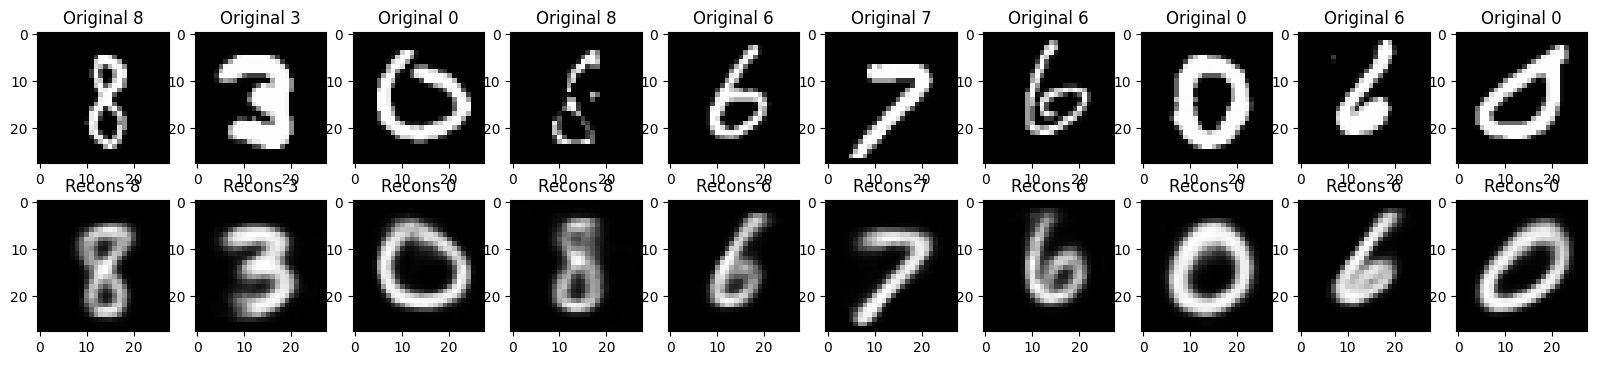

Epoch 5 | Average Loss: 4112.003493449327 | Average MSE: 3036.9624028643057 | Average KLD: 537.5205405424399
Epoch 6 | Iteration 0 | Loss 4085.265869140625 | MSE 2993.39892578125 | KLD 545.9334716796875
Epoch 6 | Iteration 100 | Loss 4054.33544921875 | MSE 2905.466796875 | KLD 574.4342651367188
Epoch 6 | Iteration 200 | Loss 3983.208984375 | MSE 2928.236572265625 | KLD 527.4861450195312
Epoch 6 | Iteration 300 | Loss 4058.00537109375 | MSE 2944.548828125 | KLD 556.7282104492188
Epoch 6 | Iteration 400 | Loss 4090.81396484375 | MSE 3026.7177734375 | KLD 532.048095703125
Epoch 6 | Average Loss: 4086.569445254198 | Average MSE: 2991.6772627515325 | Average KLD: 547.4460939842501
Epoch 7 | Iteration 0 | Loss 3939.65576171875 | MSE 2835.91015625 | KLD 551.8728637695312
Epoch 7 | Iteration 100 | Loss 4079.28515625 | MSE 2948.751708984375 | KLD 565.2667846679688
Epoch 7 | Iteration 200 | Loss 4198.1884765625 | MSE 3065.380615234375 | KLD 566.404052734375
Epoch 7 | Iteration 300 | Loss 3894.79

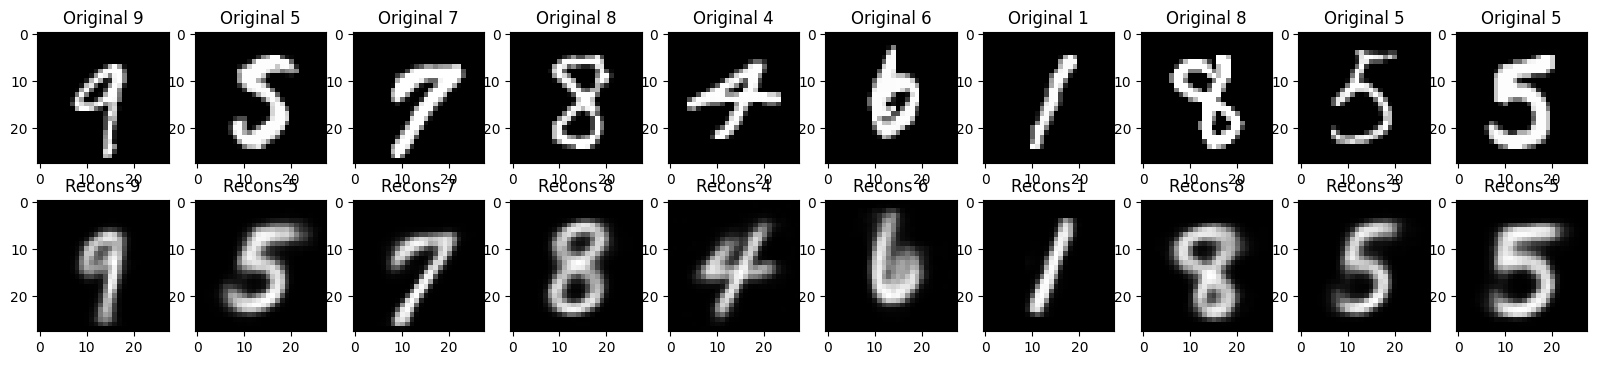

Epoch 9 | Average Loss: 4029.4764656766392 | Average MSE: 2890.3998206165047 | Average KLD: 569.538324872568
Training with beta = 4
Epoch 0 | Iteration 0 | Loss 25554.291015625 | MSE 24319.1953125 | KLD 308.7738952636719
Epoch 0 | Iteration 100 | Loss 5139.2333984375 | MSE 4926.490234375 | KLD 53.18584442138672
Epoch 0 | Iteration 200 | Loss 5287.4501953125 | MSE 4912.4287109375 | KLD 93.75537109375
Epoch 0 | Iteration 300 | Loss 5665.76220703125 | MSE 5180.7822265625 | KLD 121.2449722290039
Epoch 0 | Iteration 400 | Loss 5341.7861328125 | MSE 4894.75244140625 | KLD 111.7584228515625


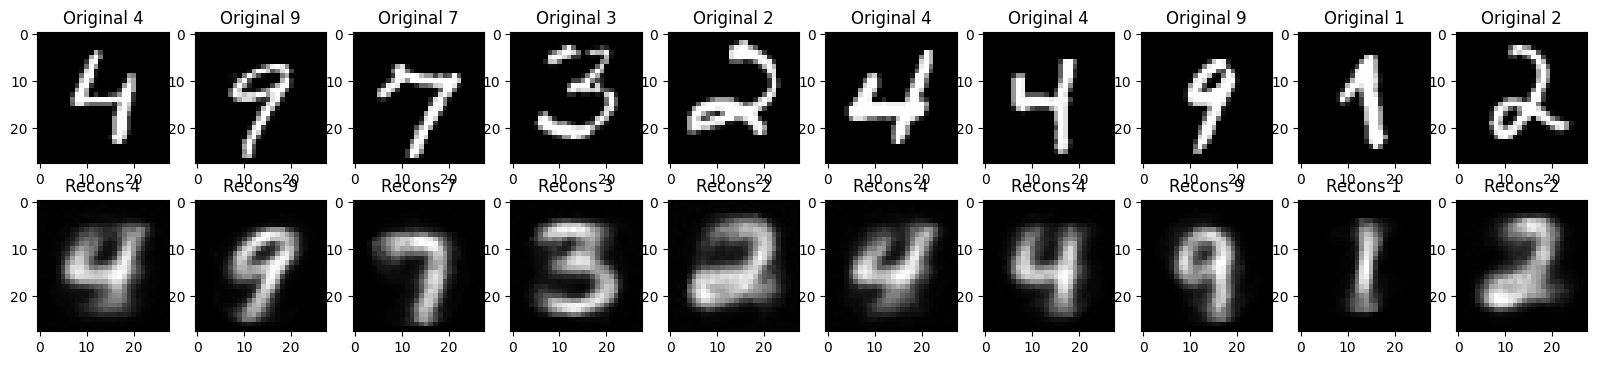

Epoch 0 | Average Loss: 5478.854461474713 | Average MSE: 5096.3712738622735 | Average KLD: 95.62079593520174
Epoch 1 | Iteration 0 | Loss 4991.0341796875 | MSE 4478.6953125 | KLD 128.08474731445312
Epoch 1 | Iteration 100 | Loss 5130.5791015625 | MSE 4520.9599609375 | KLD 152.40478515625
Epoch 1 | Iteration 200 | Loss 4848.56396484375 | MSE 4192.23486328125 | KLD 164.0822296142578
Epoch 1 | Iteration 300 | Loss 5082.44482421875 | MSE 4379.544921875 | KLD 175.7250213623047
Epoch 1 | Iteration 400 | Loss 5099.439453125 | MSE 4369.16455078125 | KLD 182.56871032714844
Epoch 1 | Average Loss: 5056.395410468584 | Average MSE: 4413.830838656883 | Average KLD: 160.641143571085
Epoch 2 | Iteration 0 | Loss 5007.30322265625 | MSE 4294.0693359375 | KLD 178.3084716796875
Epoch 2 | Iteration 100 | Loss 5218.26171875 | MSE 4486.5 | KLD 182.94036865234375
Epoch 2 | Iteration 200 | Loss 4908.28125 | MSE 4198.47021484375 | KLD 177.45281982421875
Epoch 2 | Iteration 300 | Loss 5017.2607421875 | MSE 4338

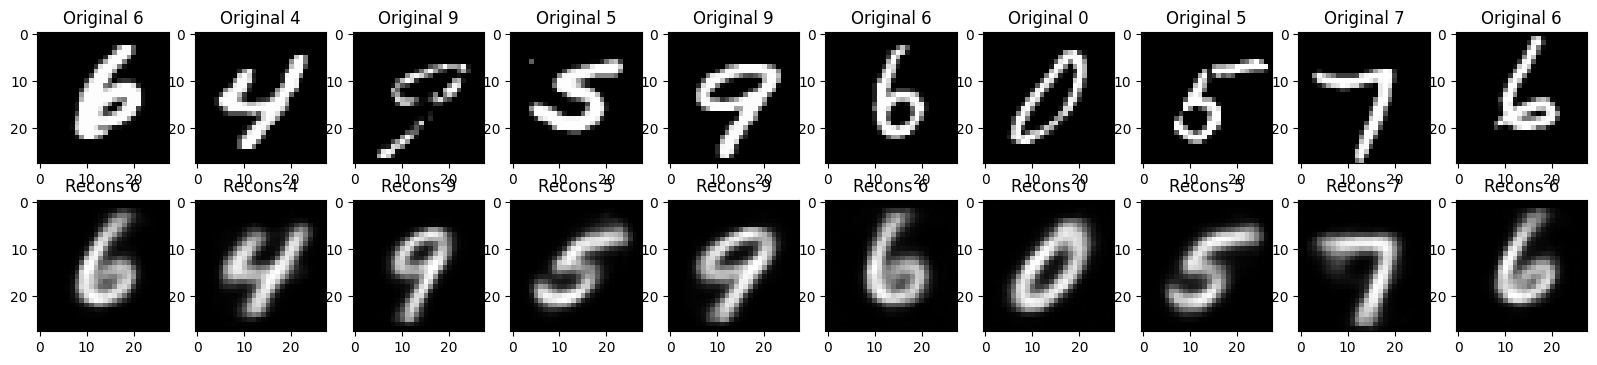

Epoch 5 | Average Loss: 4843.355021072095 | Average MSE: 4049.486022038246 | Average KLD: 198.46724829439924
Epoch 6 | Iteration 0 | Loss 5081.51123046875 | MSE 4279.9306640625 | KLD 200.39517211914062
Epoch 6 | Iteration 100 | Loss 4946.3056640625 | MSE 4162.0224609375 | KLD 196.07081604003906
Epoch 6 | Iteration 200 | Loss 5121.60595703125 | MSE 4279.33837890625 | KLD 210.56689453125
Epoch 6 | Iteration 300 | Loss 4897.0966796875 | MSE 4129.3681640625 | KLD 191.9321746826172
Epoch 6 | Iteration 400 | Loss 4809.9599609375 | MSE 4049.5859375 | KLD 190.09349060058594
Epoch 6 | Average Loss: 4833.703549773454 | Average MSE: 4028.0847792635595 | Average KLD: 201.40469269254314
Epoch 7 | Iteration 0 | Loss 4616.2763671875 | MSE 3817.403076171875 | KLD 199.71832275390625
Epoch 7 | Iteration 100 | Loss 4526.2080078125 | MSE 3712.853759765625 | KLD 203.3385009765625
Epoch 7 | Iteration 200 | Loss 4887.18115234375 | MSE 4100.4921875 | KLD 196.6721954345703
Epoch 7 | Iteration 300 | Loss 5001.3

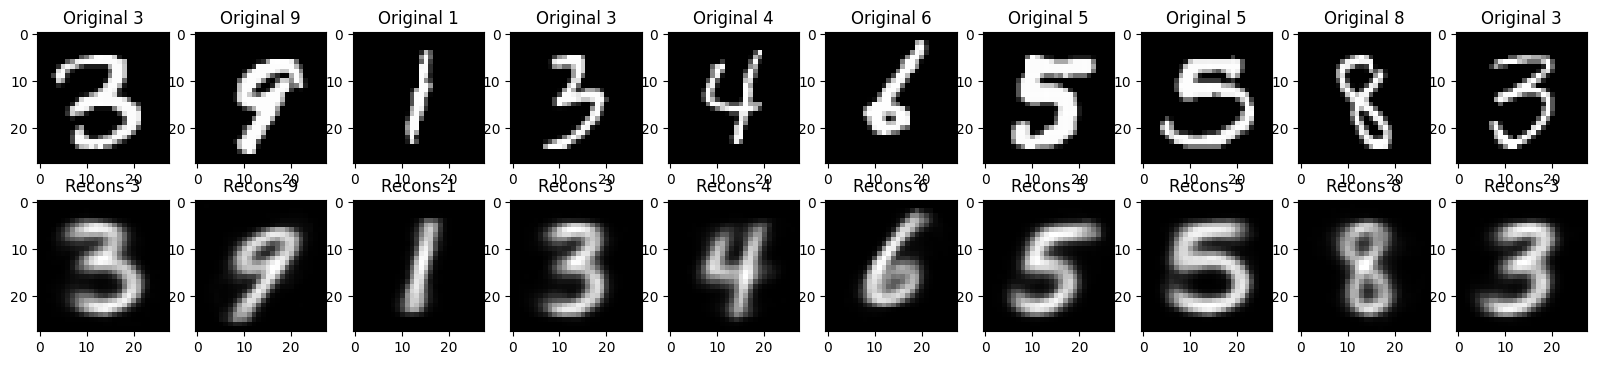

Epoch 9 | Average Loss: 4794.19433229361 | Average MSE: 3958.4888955057304 | Average KLD: 208.92636300353354
Training with beta = 8
Epoch 0 | Iteration 0 | Loss 26810.63671875 | MSE 24181.001953125 | KLD 328.7044372558594
Epoch 0 | Iteration 100 | Loss 5316.5478515625 | MSE 5263.8310546875 | KLD 6.58961296081543
Epoch 0 | Iteration 200 | Loss 5644.8505859375 | MSE 5595.900390625 | KLD 6.118779182434082
Epoch 0 | Iteration 300 | Loss 5282.99267578125 | MSE 5215.447265625 | KLD 8.443191528320312
Epoch 0 | Iteration 400 | Loss 5274.0869140625 | MSE 5172.1708984375 | KLD 12.739500045776367


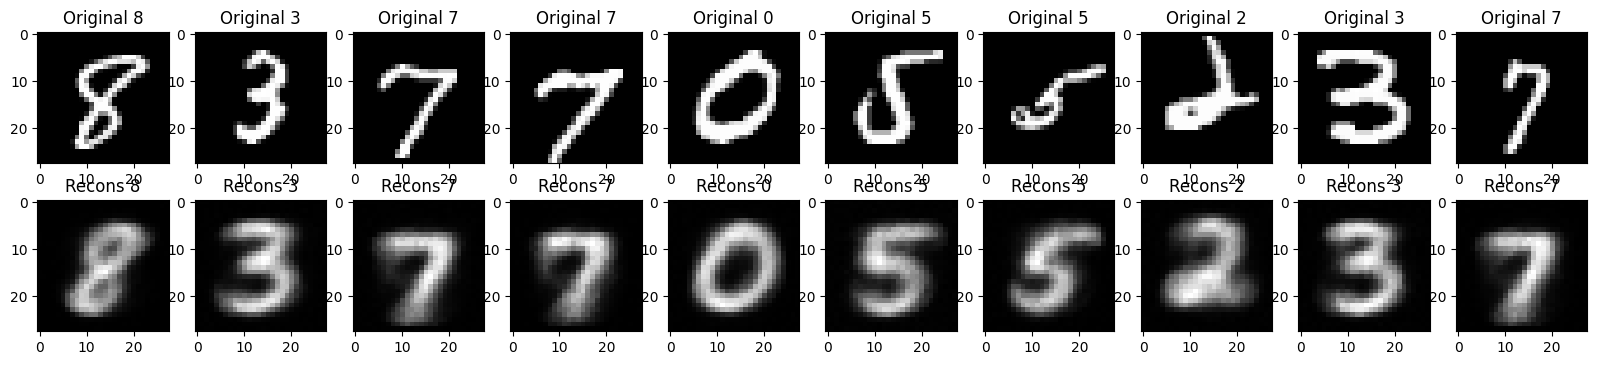

Epoch 0 | Average Loss: 5657.519536976113 | Average MSE: 5537.6098414179105 | Average KLD: 14.988712649355564
Epoch 1 | Iteration 0 | Loss 5448.9892578125 | MSE 5318.173828125 | KLD 16.351930618286133
Epoch 1 | Iteration 100 | Loss 5478.20947265625 | MSE 5365.68994140625 | KLD 14.064969062805176
Epoch 1 | Iteration 200 | Loss 5548.1240234375 | MSE 5416.43359375 | KLD 16.461334228515625
Epoch 1 | Iteration 300 | Loss 5568.904296875 | MSE 5427.2734375 | KLD 17.703868865966797
Epoch 1 | Iteration 400 | Loss 5513.15185546875 | MSE 5348.546875 | KLD 20.575651168823242
Epoch 1 | Average Loss: 5417.095134678171 | Average MSE: 5268.655089681337 | Average KLD: 18.555005022711846
Epoch 2 | Iteration 0 | Loss 5145.4873046875 | MSE 4974.0380859375 | KLD 21.431129455566406
Epoch 2 | Iteration 100 | Loss 5415.2041015625 | MSE 5220.97021484375 | KLD 24.279232025146484
Epoch 2 | Iteration 200 | Loss 5543.05029296875 | MSE 5381.4951171875 | KLD 20.19437026977539
Epoch 2 | Iteration 300 | Loss 5471.5224

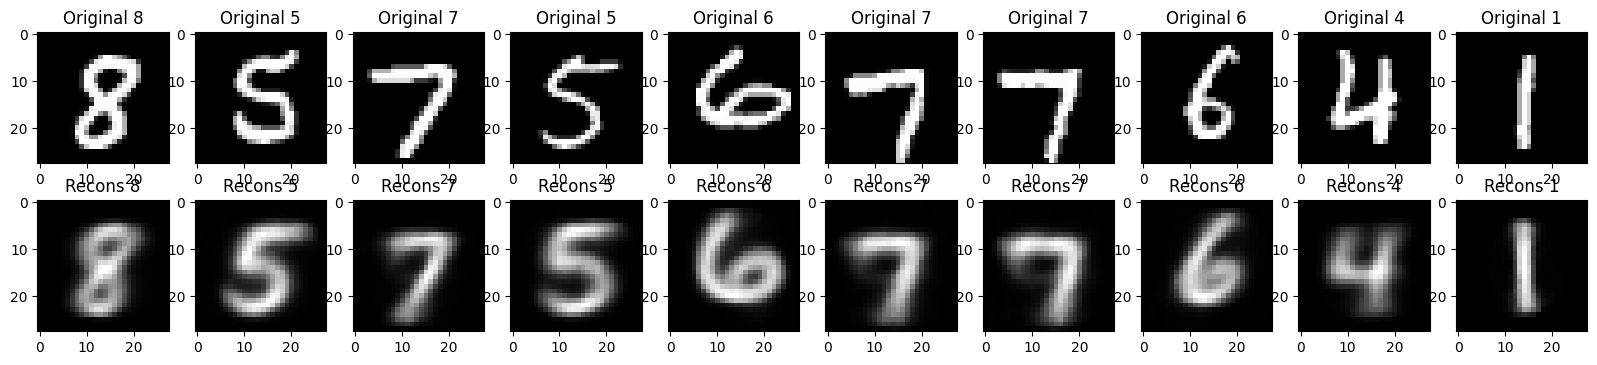

Epoch 5 | Average Loss: 5300.311078882929 | Average MSE: 4963.868562808169 | Average KLD: 42.05531413926244
Epoch 6 | Iteration 0 | Loss 5222.14501953125 | MSE 4920.634765625 | KLD 37.68876647949219
Epoch 6 | Iteration 100 | Loss 5255.2392578125 | MSE 4880.35595703125 | KLD 46.86042022705078
Epoch 6 | Iteration 200 | Loss 5386.02197265625 | MSE 5069.458984375 | KLD 39.57037353515625
Epoch 6 | Iteration 300 | Loss 5653.38232421875 | MSE 5301.443359375 | KLD 43.99237060546875
Epoch 6 | Iteration 400 | Loss 5489.46728515625 | MSE 5203.23779296875 | KLD 35.77867126464844
Epoch 6 | Average Loss: 5290.496979735807 | Average MSE: 4941.2043753748 | Average KLD: 43.66157482936184
Epoch 7 | Iteration 0 | Loss 5478.08203125 | MSE 5089.833984375 | KLD 48.531002044677734
Epoch 7 | Iteration 100 | Loss 5059.8564453125 | MSE 4728.4345703125 | KLD 41.42776107788086
Epoch 7 | Iteration 200 | Loss 5429.21337890625 | MSE 5072.373046875 | KLD 44.60503387451172
Epoch 7 | Iteration 300 | Loss 4970.177734375

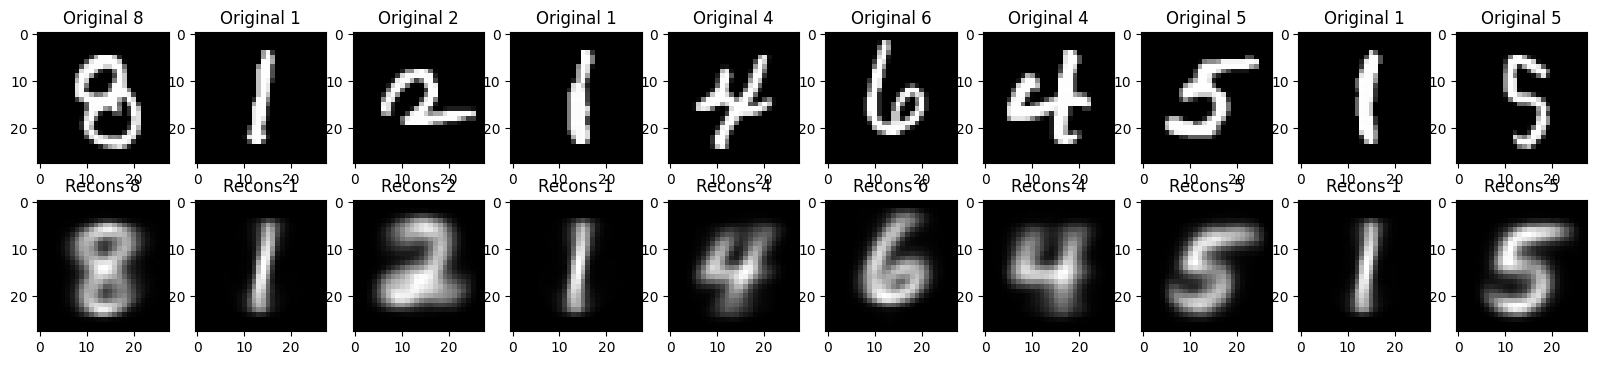

Epoch 9 | Average Loss: 5268.951073489972 | Average MSE: 4892.763733300573 | Average KLD: 47.02341716579283


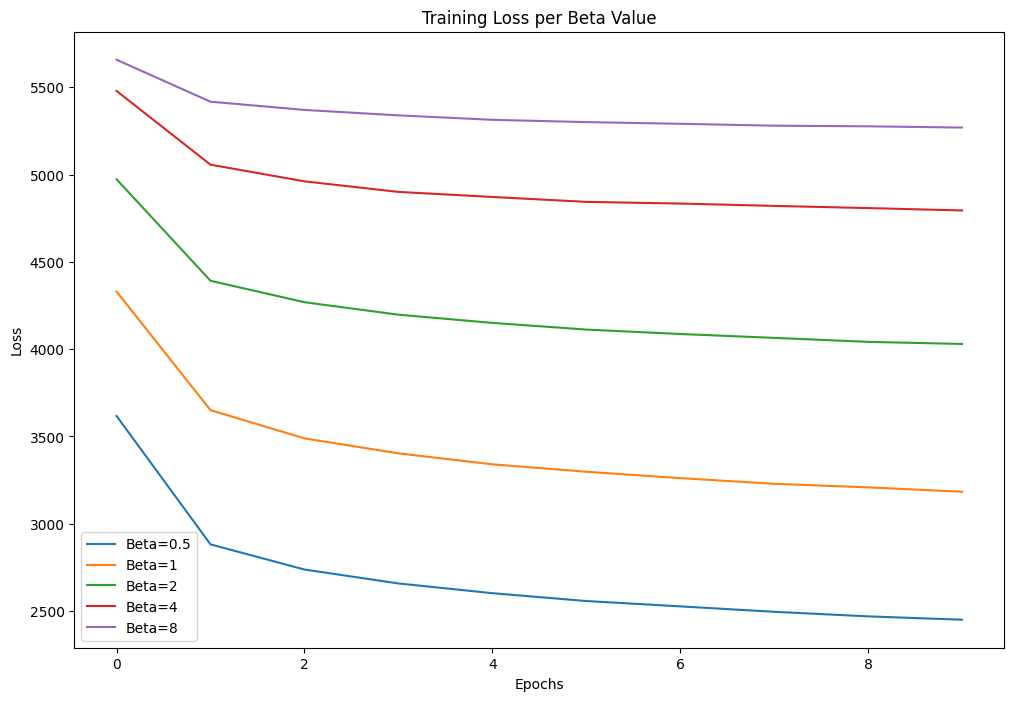

In [6]:
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    beta_values = [0.5, 1, 2, 4, 8]
    all_losses = {}

    for beta in beta_values:
        print(f"Training with beta = {beta}")
        beta_vae_conditional = ConditionalBetaVAE(z_dim=20, hidden_dim=1024, num_classes=10)
        beta_vae_conditional.to(device)
        losses, _, _ = train_model_conditional(beta_vae_conditional, train_loader, device, epochs=10, beta=beta)
        all_losses[beta] = losses

    plt.figure(figsize=(12, 8))
    for beta, losses in all_losses.items():
        plt.plot(losses, label=f'Beta={beta}')
    plt.title('Training Loss per Beta Value')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#### From the above we realise the best beta parameter for this model was found to be 0.5
## Retraining the model with the best beta parameter with 50 epochs to find out the best loss value that can be obtained and visualising MSE loss, Loss and KLD loss

Best beta: 0.5
Epoch 1/50, Loss: 3626.1709, MSE: 2839.5593, KLD: 1573.2233
Epoch 2/50, Loss: 2884.7766, MSE: 1951.1268, KLD: 1867.2997
Epoch 3/50, Loss: 2741.7383, MSE: 1786.4900, KLD: 1910.4966
Epoch 4/50, Loss: 2660.9291, MSE: 1695.9142, KLD: 1930.0297
Epoch 5/50, Loss: 2606.4277, MSE: 1639.1991, KLD: 1934.4573
Epoch 6/50, Loss: 2563.0996, MSE: 1591.5719, KLD: 1943.0554
Epoch 7/50, Loss: 2527.4716, MSE: 1555.6312, KLD: 1943.6808
Epoch 8/50, Loss: 2503.4098, MSE: 1530.5555, KLD: 1945.7085
Epoch 9/50, Loss: 2473.9143, MSE: 1503.3598, KLD: 1941.1088
Epoch 10/50, Loss: 2452.4564, MSE: 1481.8263, KLD: 1941.2601
Epoch 11/50, Loss: 2436.7568, MSE: 1463.9930, KLD: 1945.5275
Epoch 12/50, Loss: 2420.2773, MSE: 1446.8518, KLD: 1946.8510
Epoch 13/50, Loss: 2405.6862, MSE: 1431.2872, KLD: 1948.7982
Epoch 14/50, Loss: 2391.4866, MSE: 1417.4841, KLD: 1948.0051
Epoch 15/50, Loss: 2382.8661, MSE: 1407.3354, KLD: 1951.0614
Epoch 16/50, Loss: 2367.3836, MSE: 1392.4800, KLD: 1949.8071
Epoch 17/50, Loss:

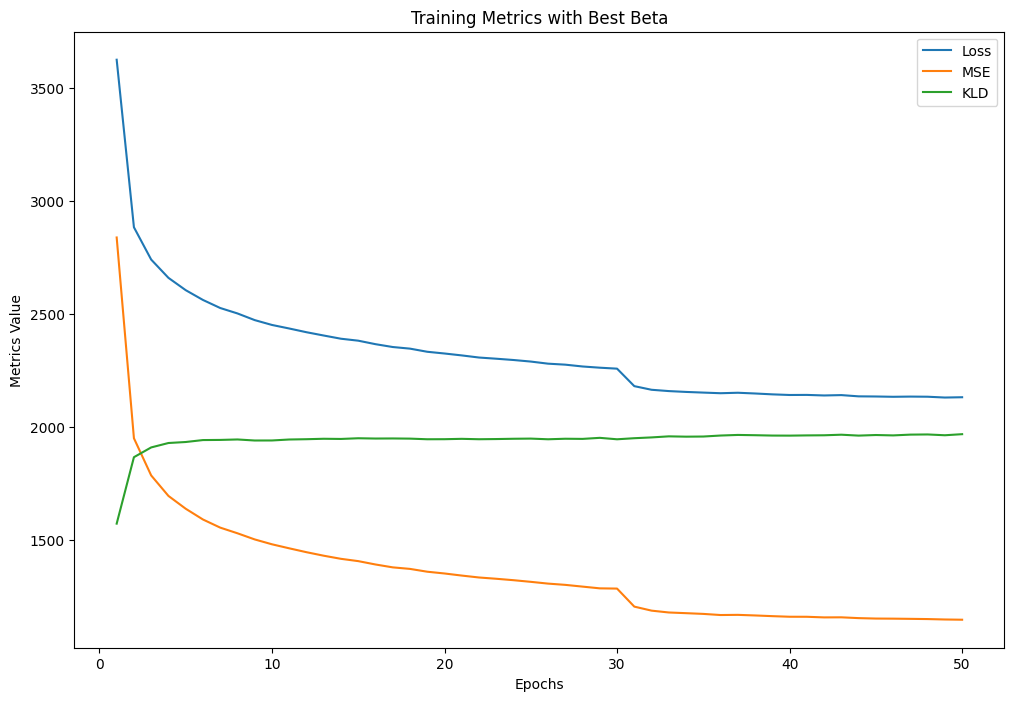

In [7]:
def retrain_with_best_beta(best_beta, train_loader, device, epochs=50):
    model = ConditionalBetaVAE(z_dim=20, hidden_dim=1024, num_classes=10).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

    # Lists to store per-epoch loss and metrics
    epoch_losses = []
    epoch_mses = []
    epoch_klds = []

    for epoch in range(epochs):
        model.train()
        batch_losses = []
        batch_mses = []
        batch_klds = []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            recon_images, mu, log_var = model(images, labels)
            loss, mse, kld = vae_loss(recon_images, images, mu, log_var, beta=best_beta)
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_mses.append(mse.item())
            batch_klds.append(kld.item())

        avg_loss = np.mean(batch_losses)
        avg_mse = np.mean(batch_mses)
        avg_kld = np.mean(batch_klds)

        epoch_losses.append(avg_loss)
        epoch_mses.append(avg_mse)
        epoch_klds.append(avg_kld)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, MSE: {avg_mse:.4f}, KLD: {avg_kld:.4f}")
        scheduler.step()

    # After training, plot the metrics
    plt.figure(figsize=(12, 8))
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, epoch_losses, label='Loss')
    plt.plot(epochs_range, epoch_mses, label='MSE')
    plt.plot(epochs_range, epoch_klds, label='KLD')
    plt.title('Training Metrics with Best Beta')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics Value')
    plt.legend()
    plt.show()

def find_best_beta(all_losses):
    # Identify best beta based on the lowest final avg loss
    best_beta = min(all_losses, key=lambda x: all_losses[x][-1])
    return best_beta

# Assuming all_losses dictionary has been populated as in your provided main.py context
best_beta = find_best_beta(all_losses)
print(f"Best beta: {best_beta}")

# Retrain the model with the best beta
retrain_with_best_beta(best_beta, train_loader, device)

## Visualizations of each Epoch of the model trained based on the best beta parameter


Epoch 0


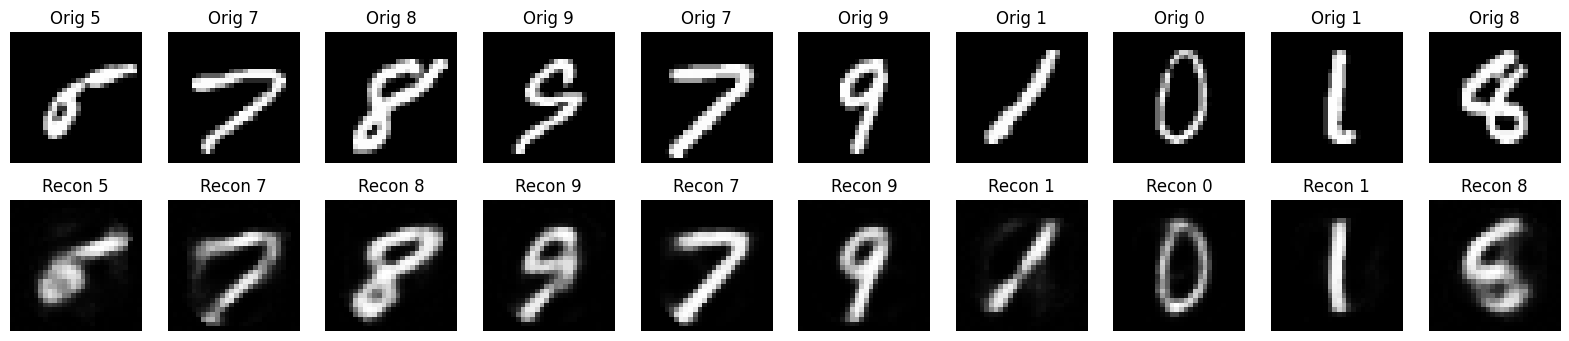


Epoch 1


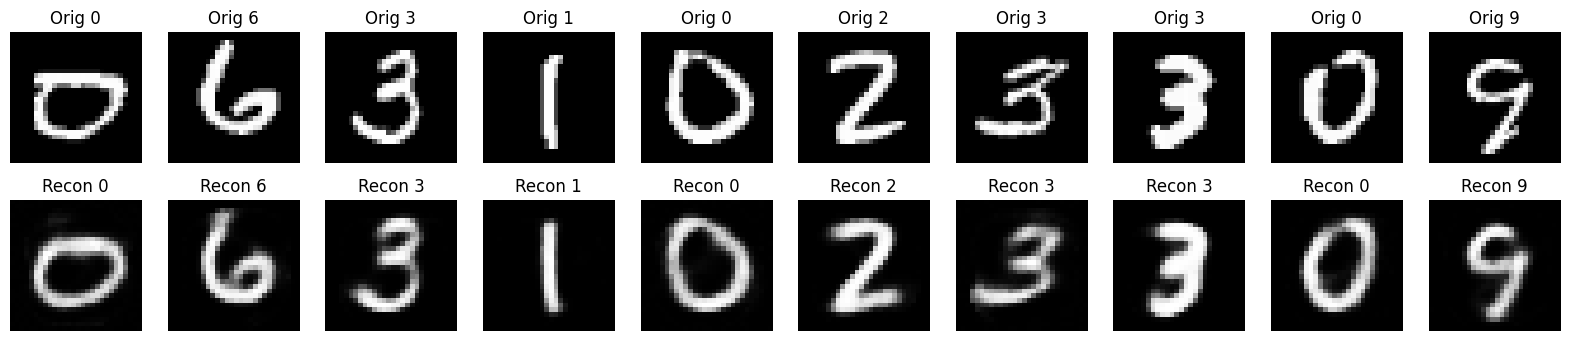


Epoch 2


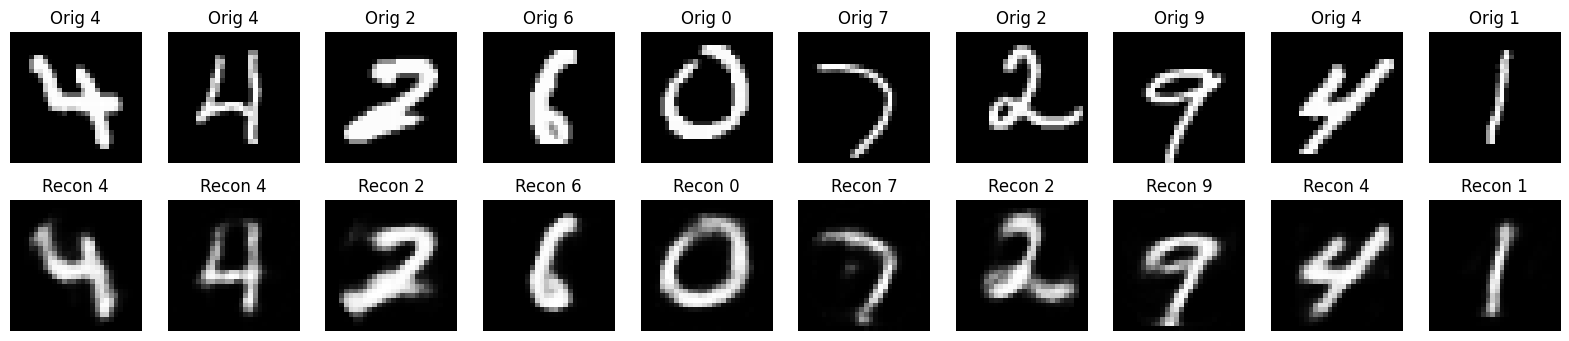


Epoch 3


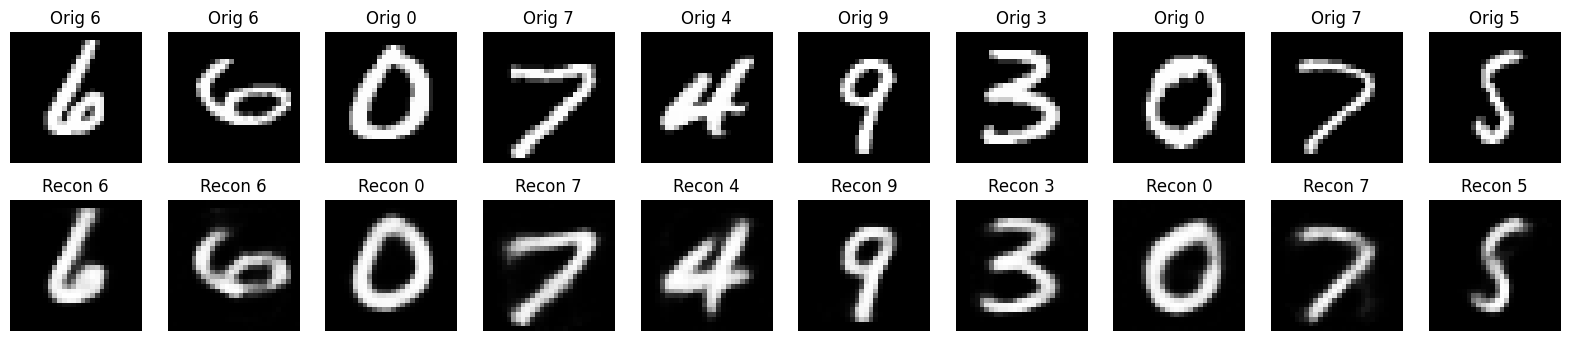


Epoch 4


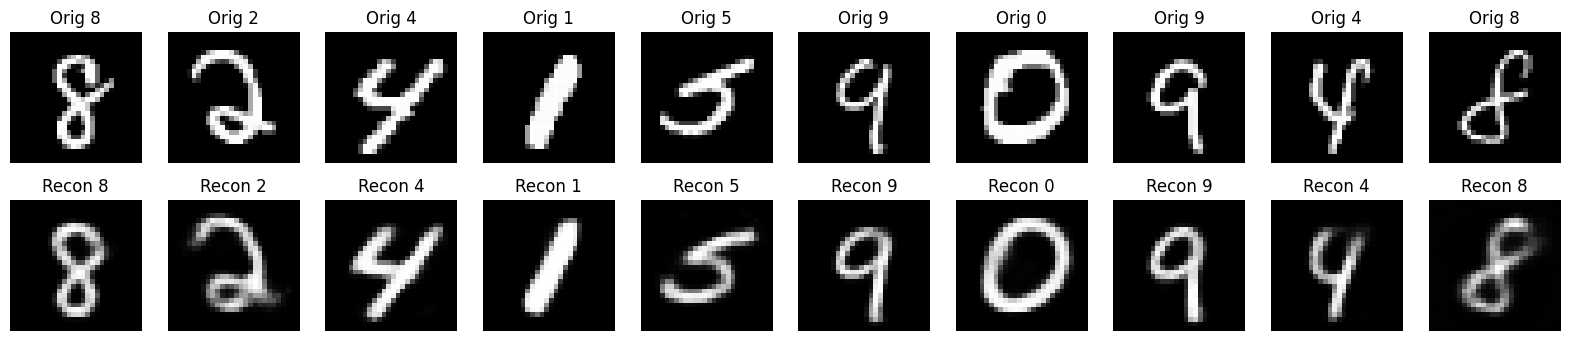


Epoch 5


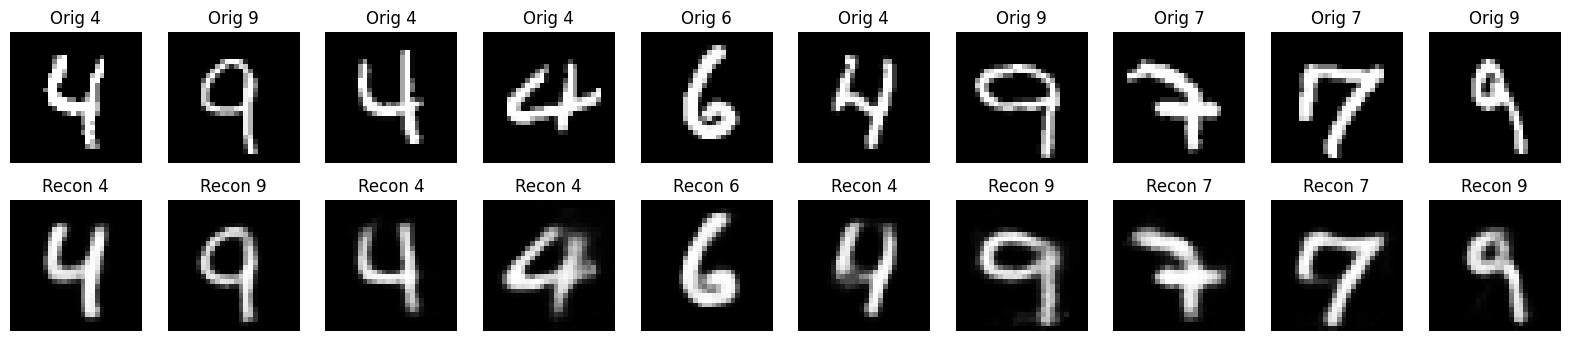


Epoch 6


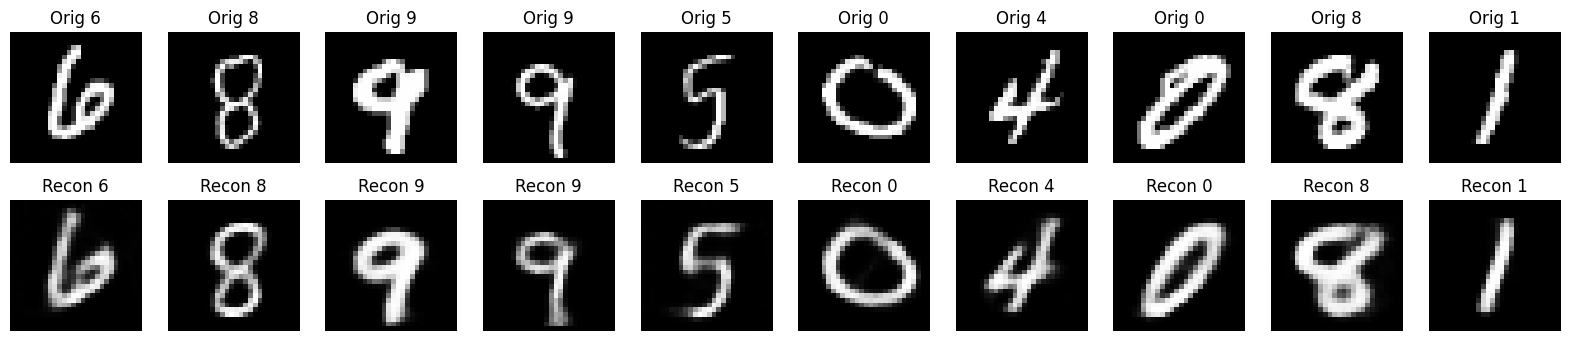


Epoch 7


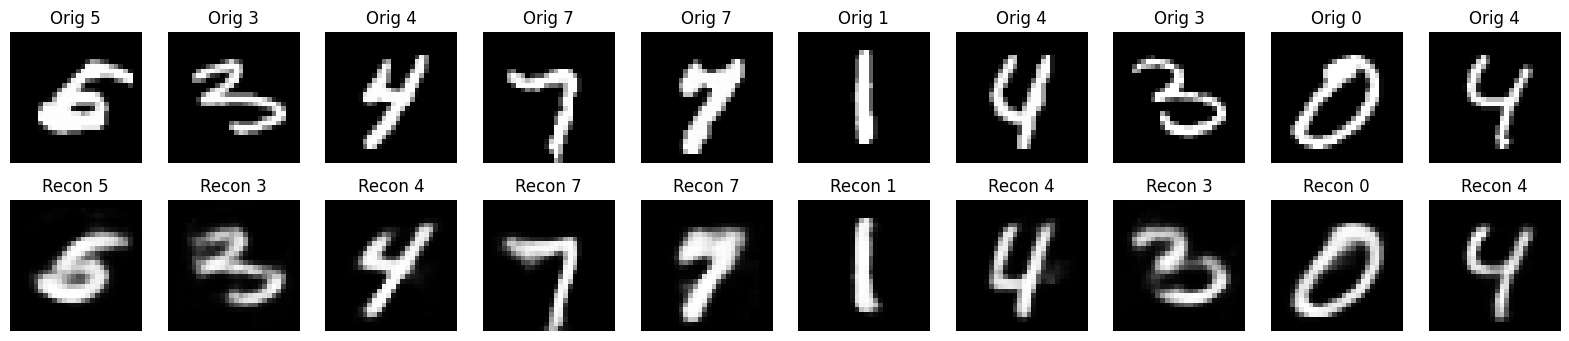


Epoch 8


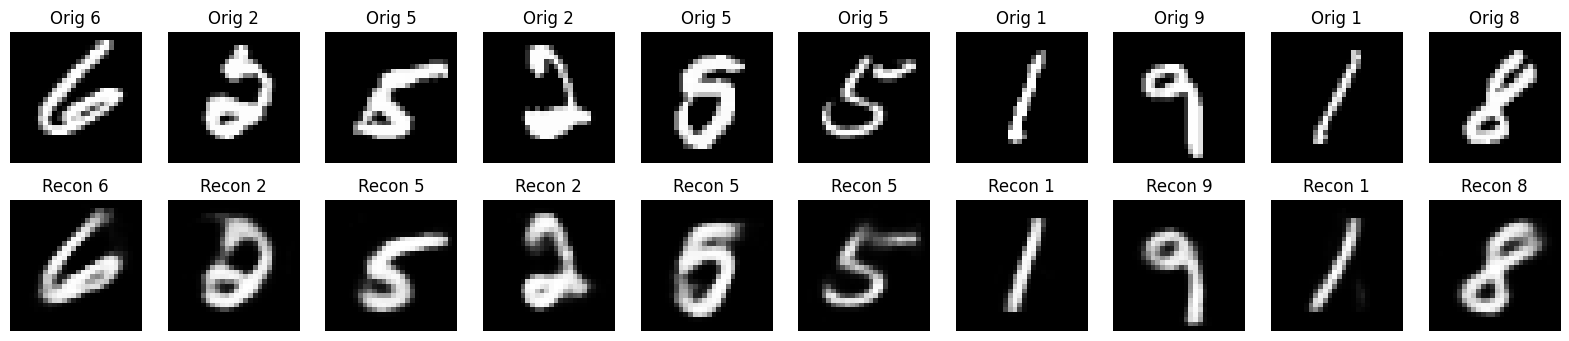


Epoch 9


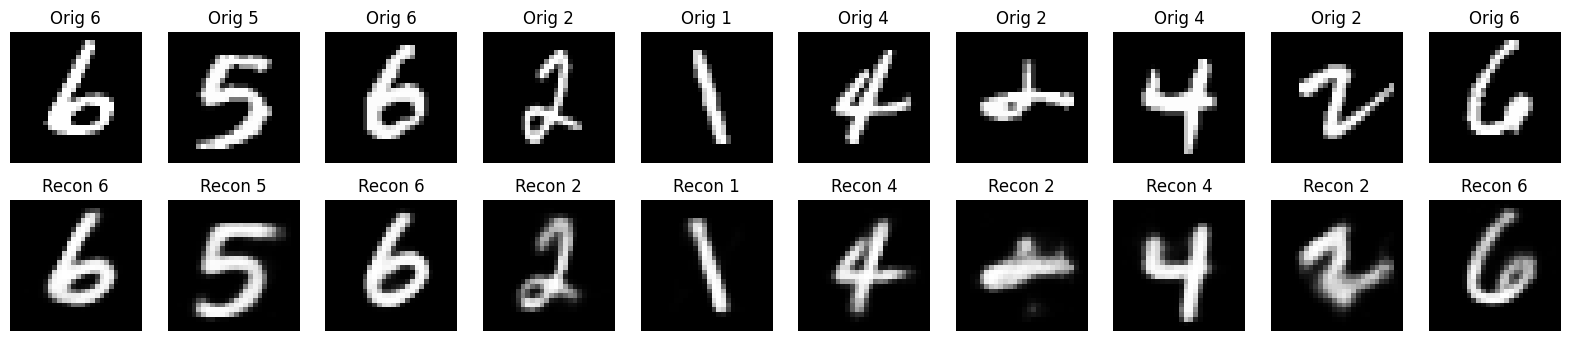


Epoch 10


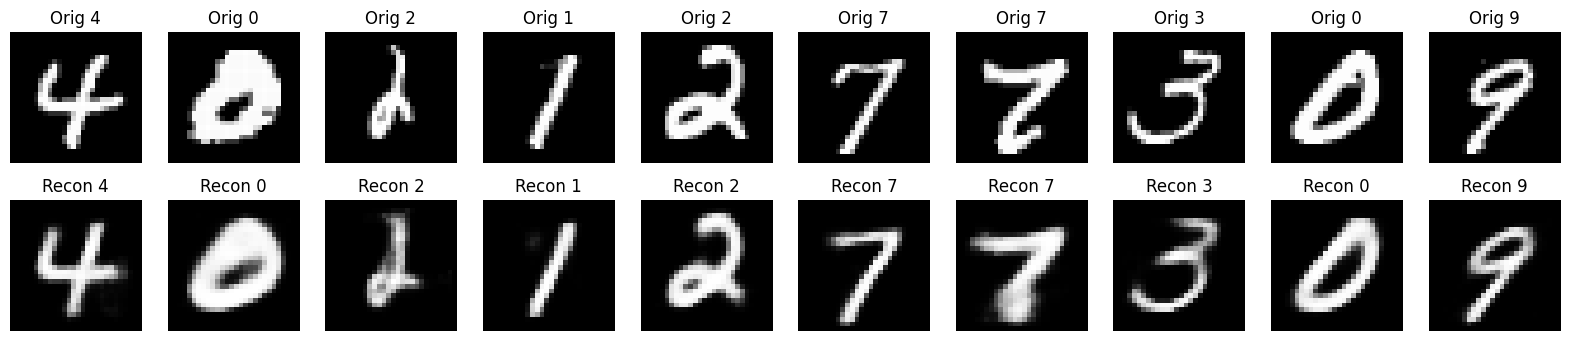


Epoch 11


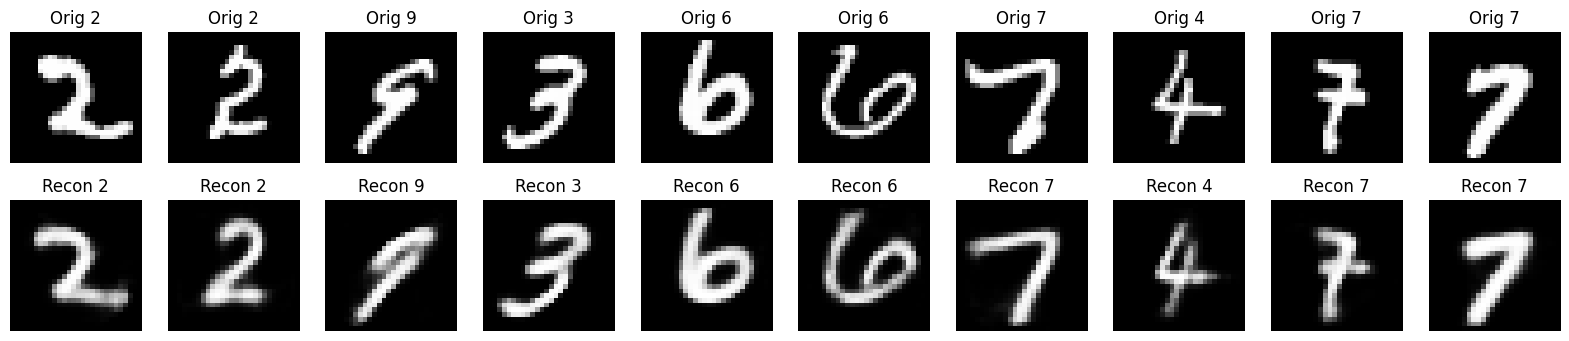


Epoch 12


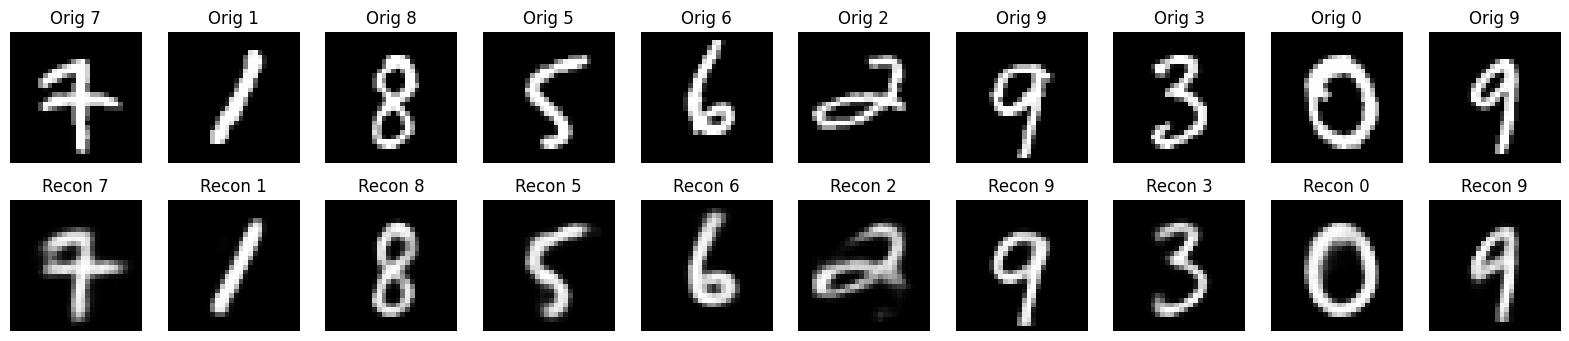


Epoch 13


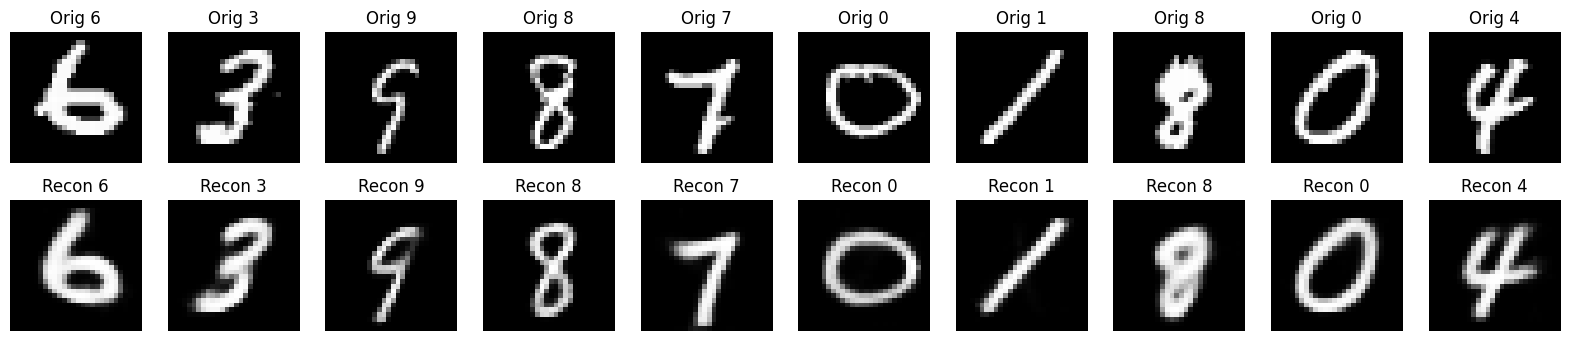


Epoch 14


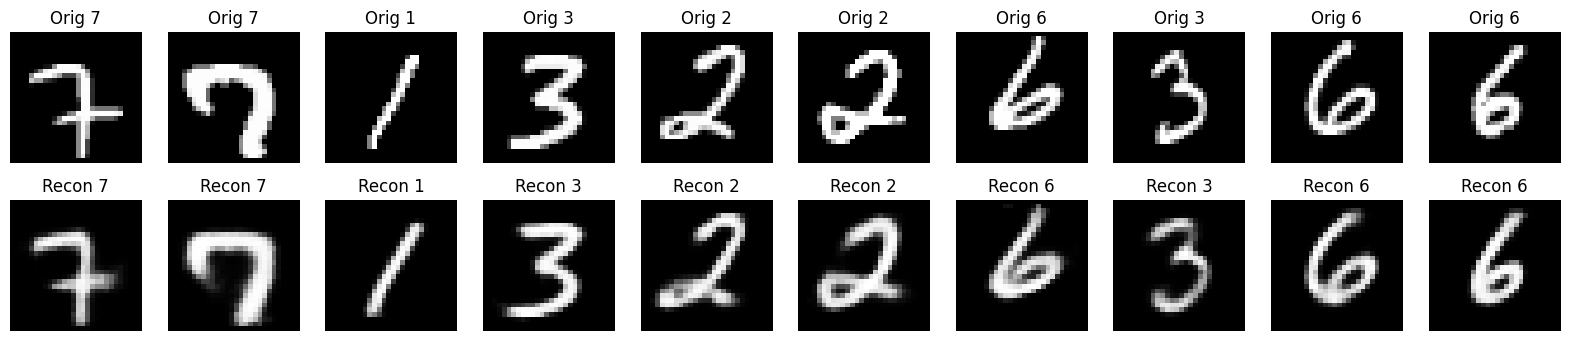


Epoch 15


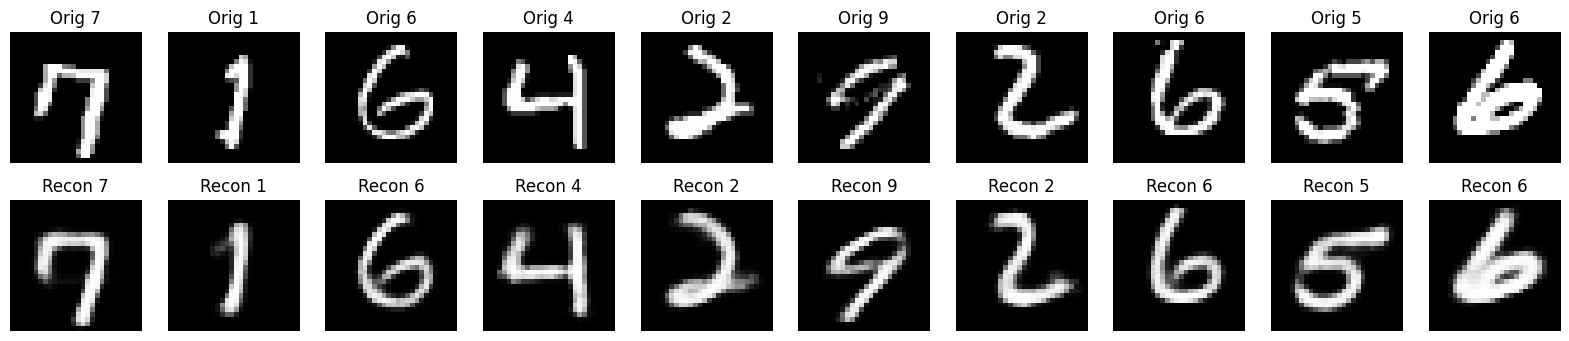


Epoch 16


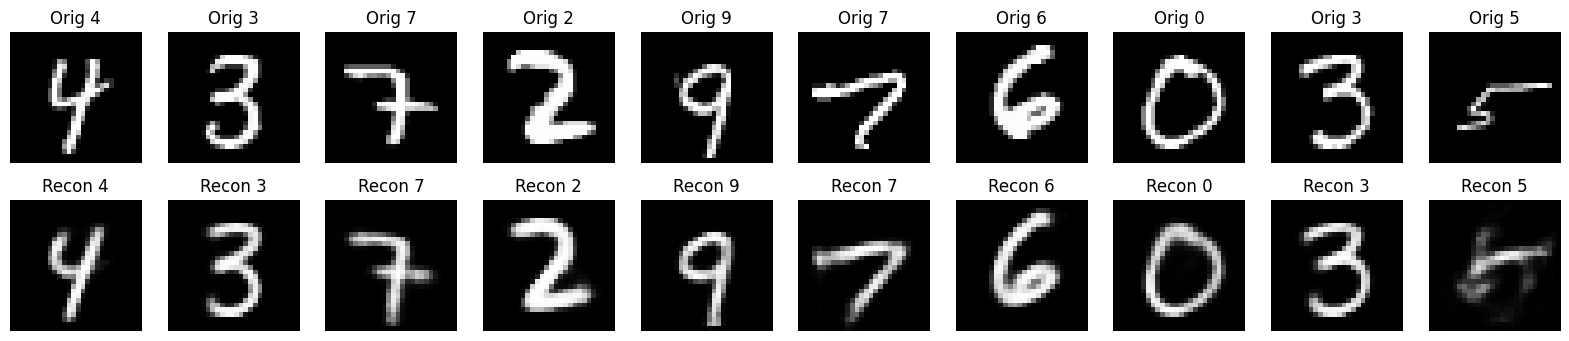


Epoch 17


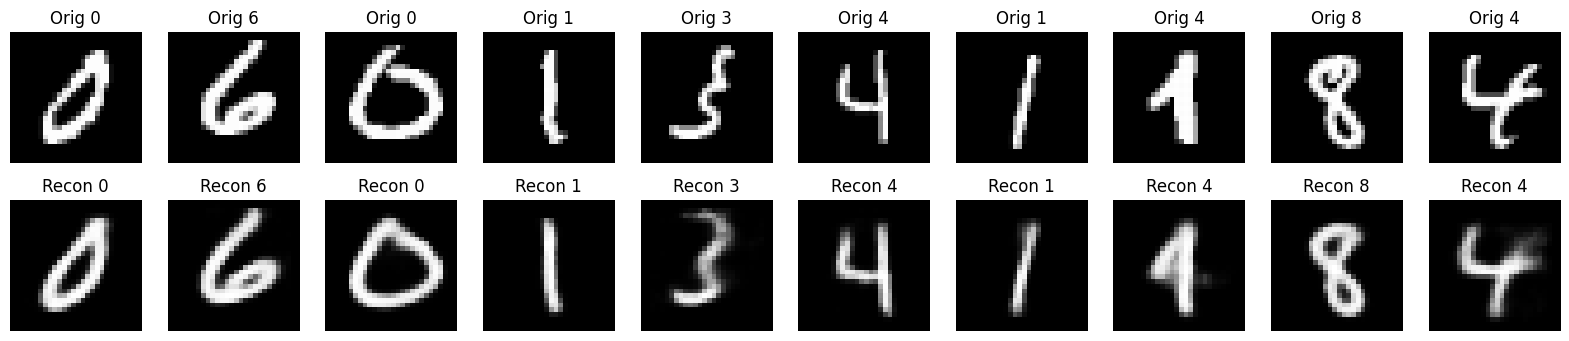


Epoch 18


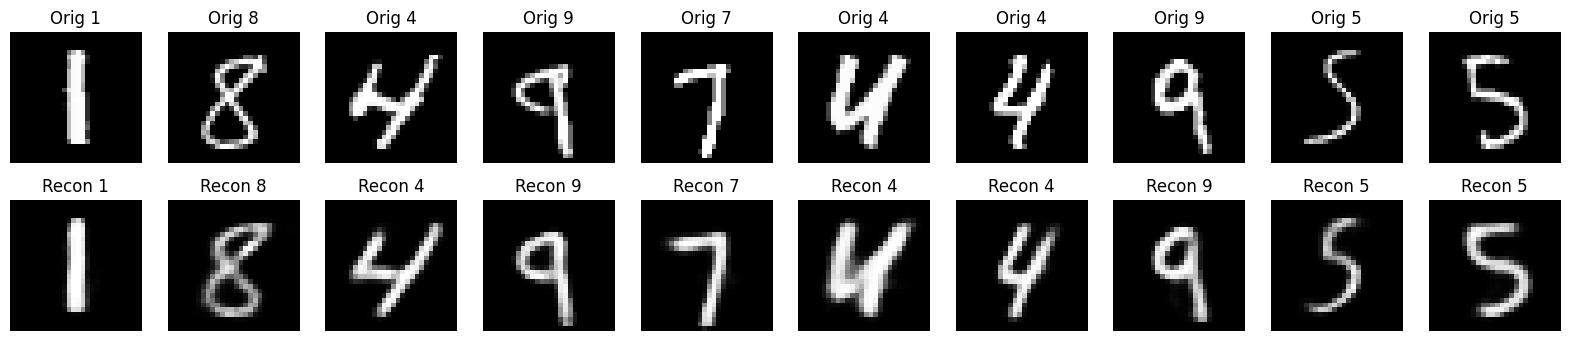


Epoch 19


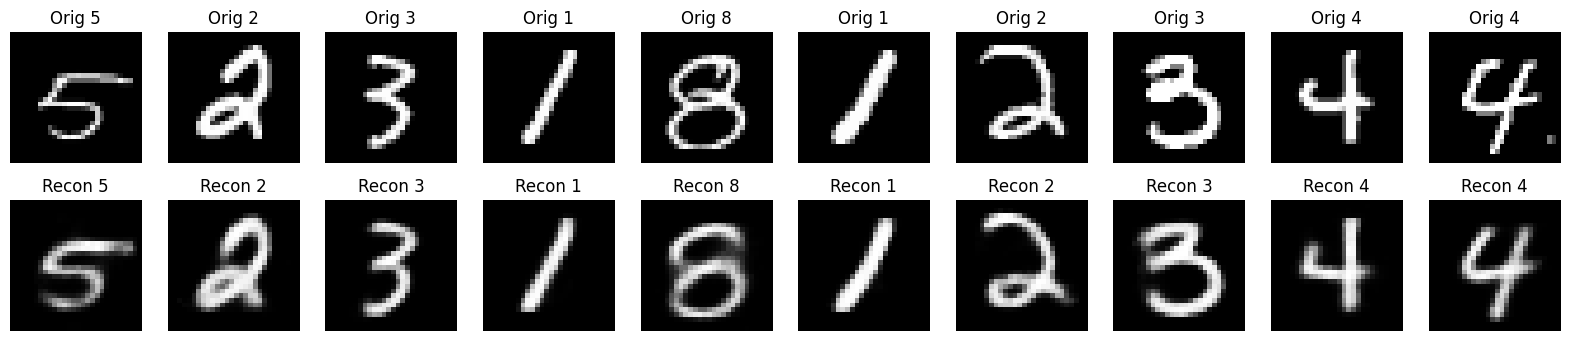


Epoch 20


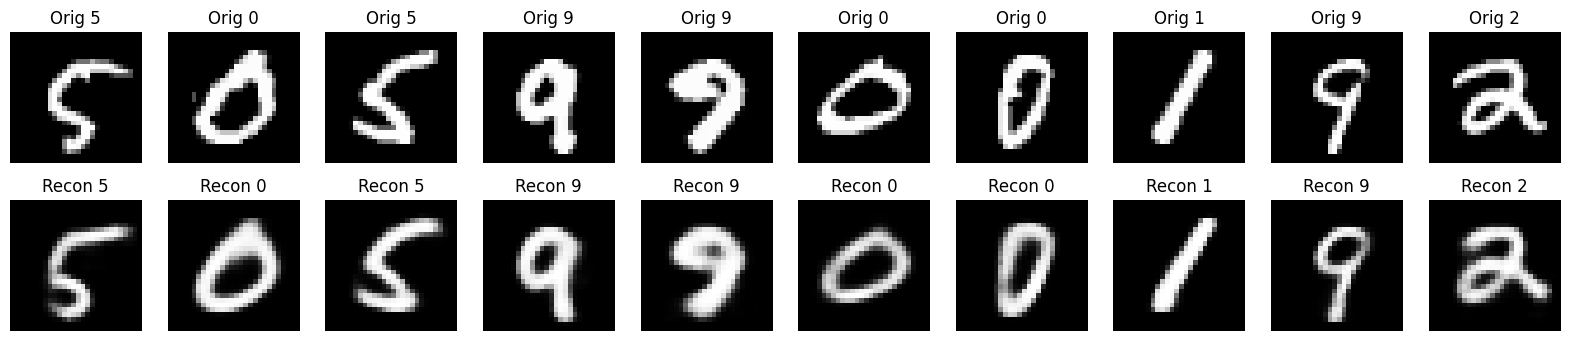


Epoch 21


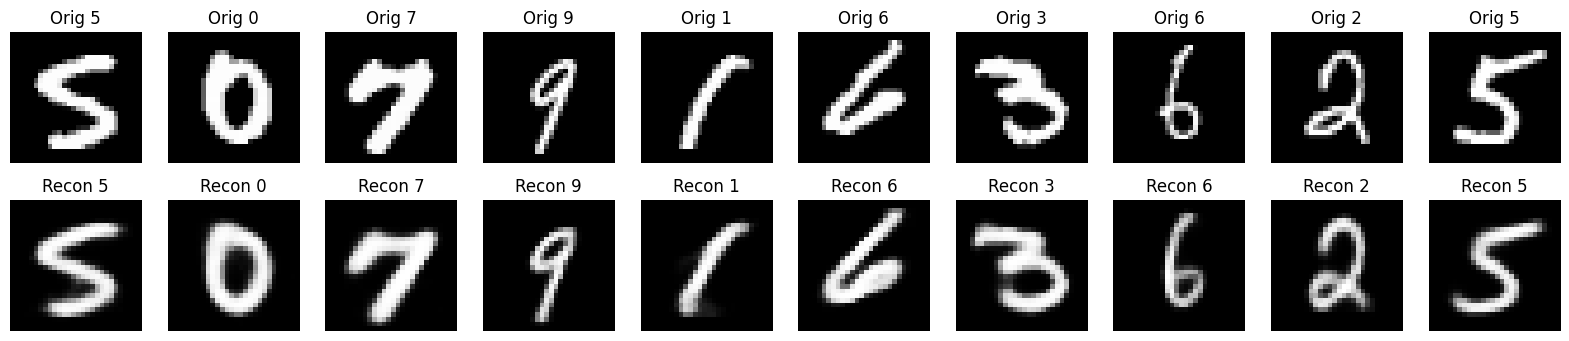


Epoch 22


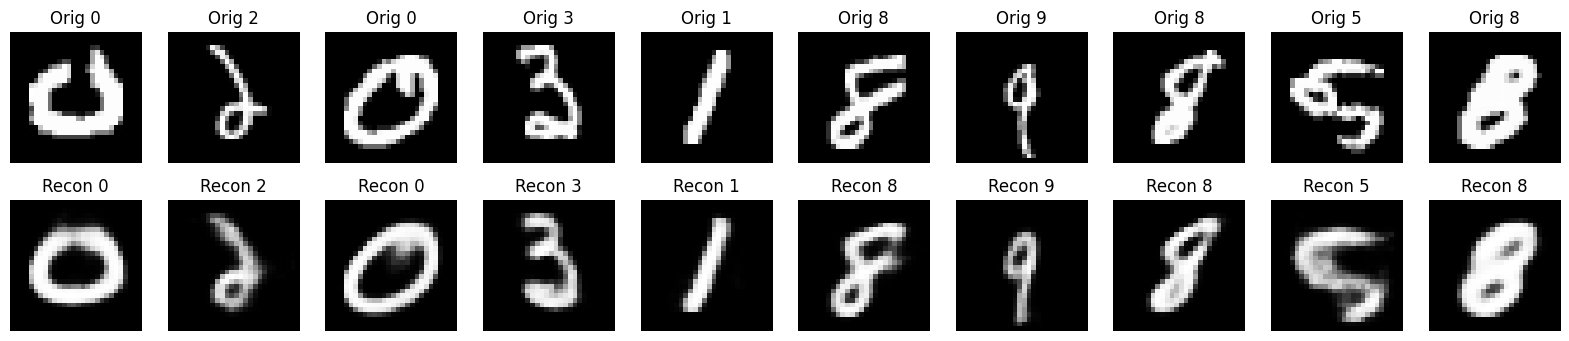


Epoch 23


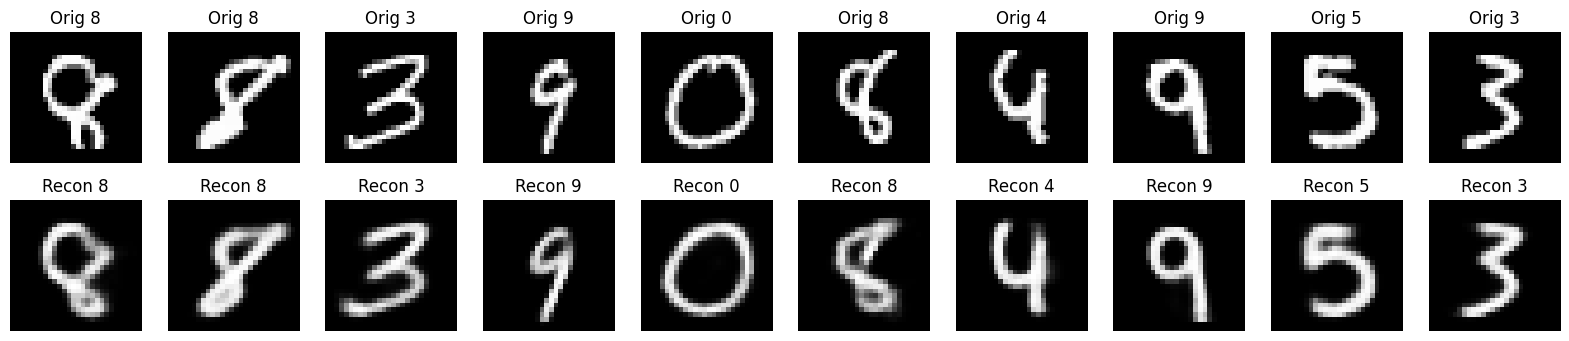


Epoch 24


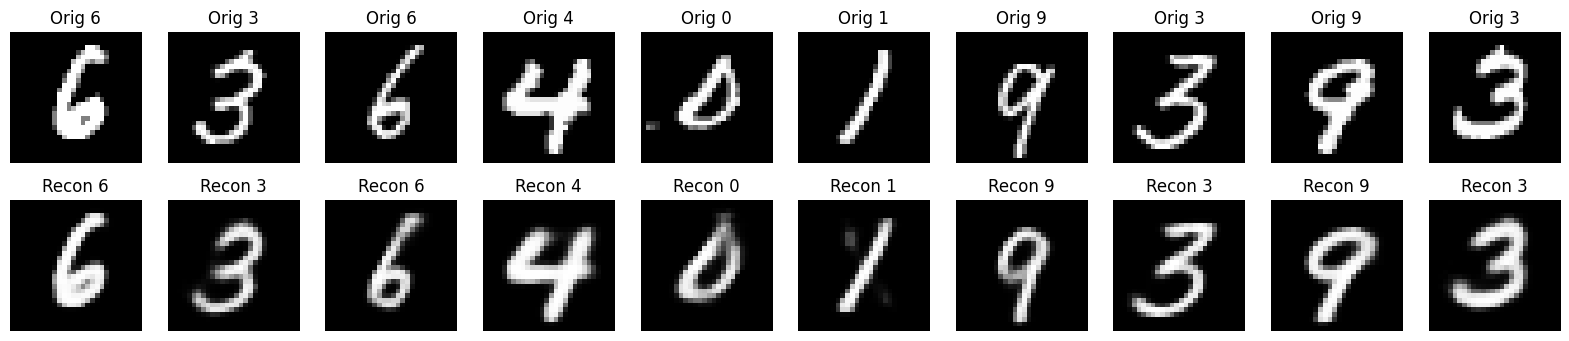


Epoch 25


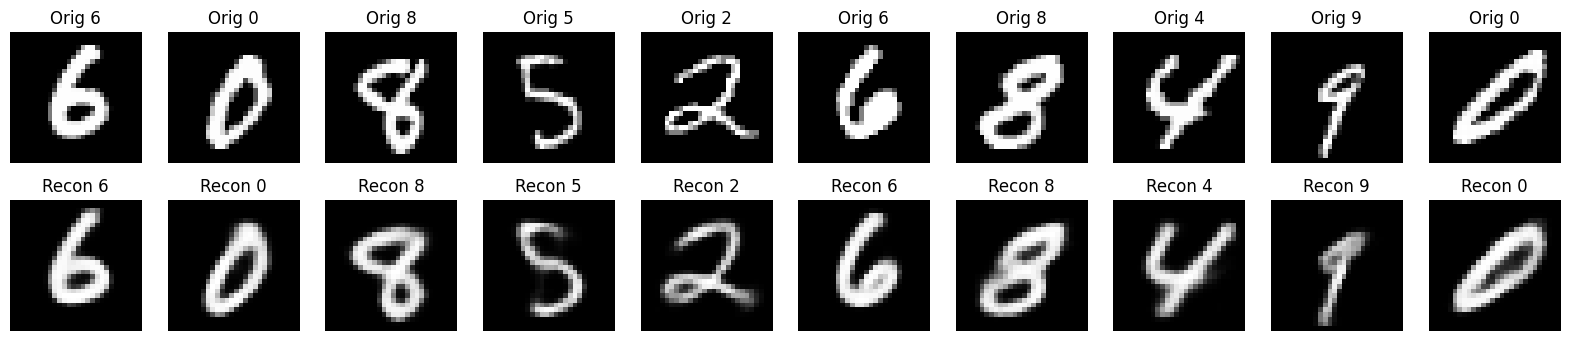


Epoch 26


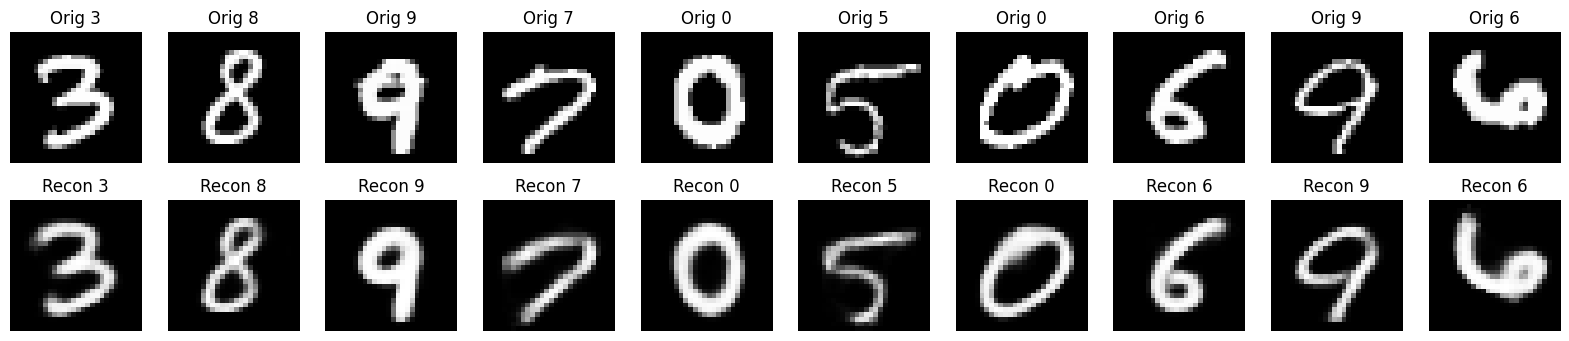


Epoch 27


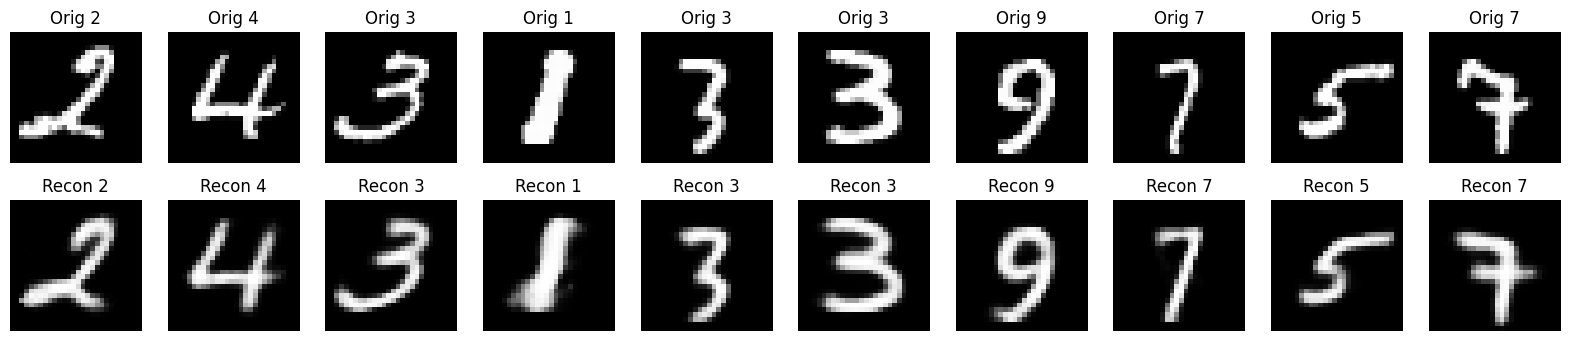


Epoch 28


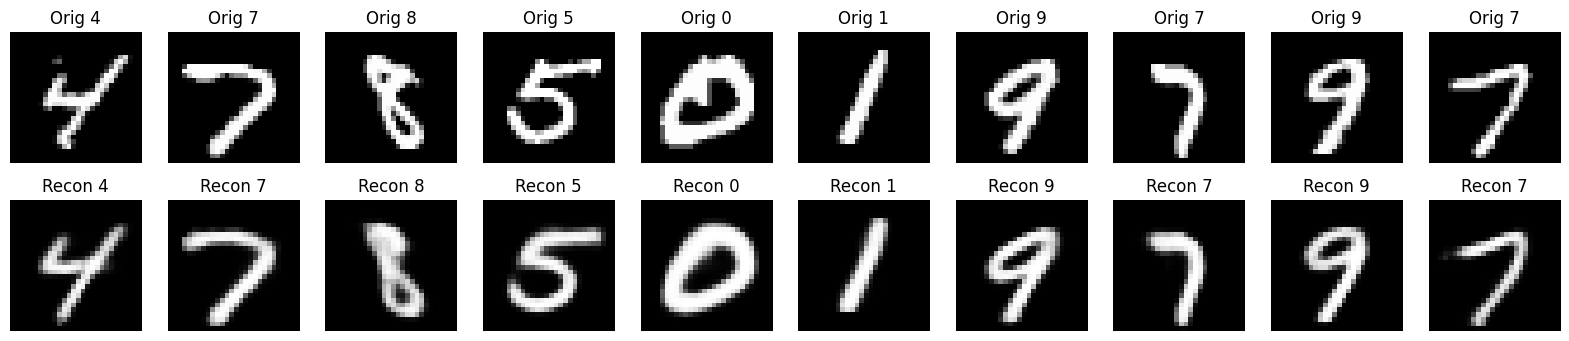


Epoch 29


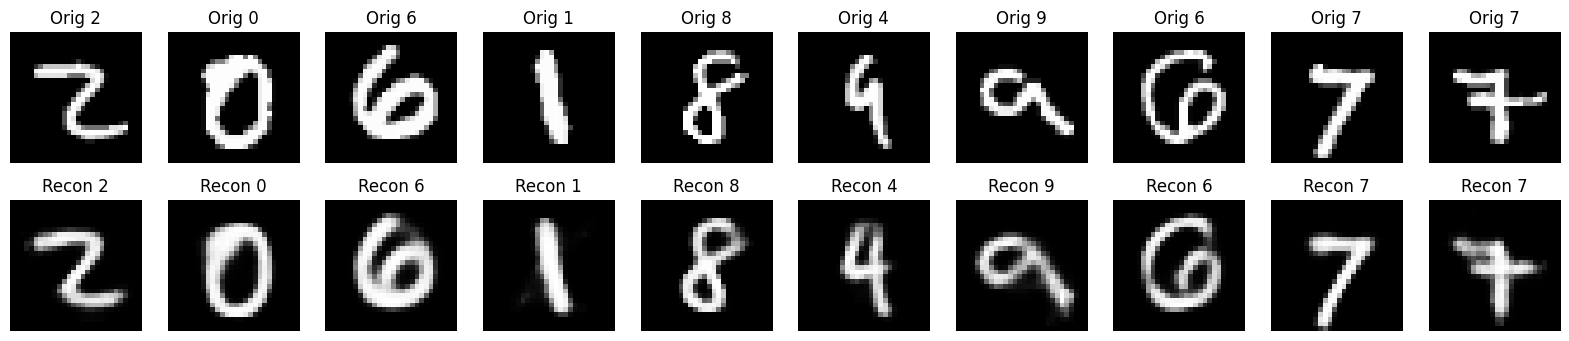


Epoch 30


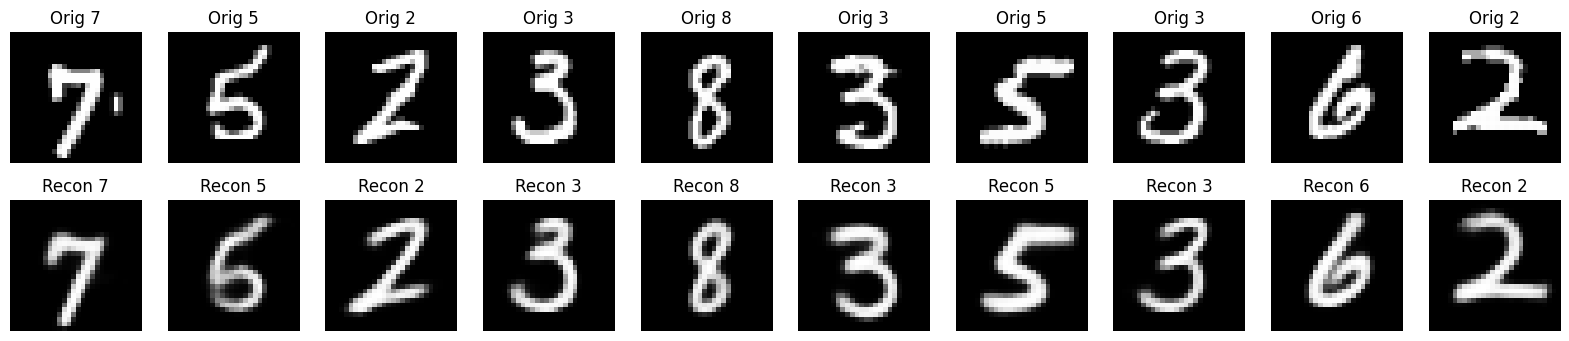


Epoch 31


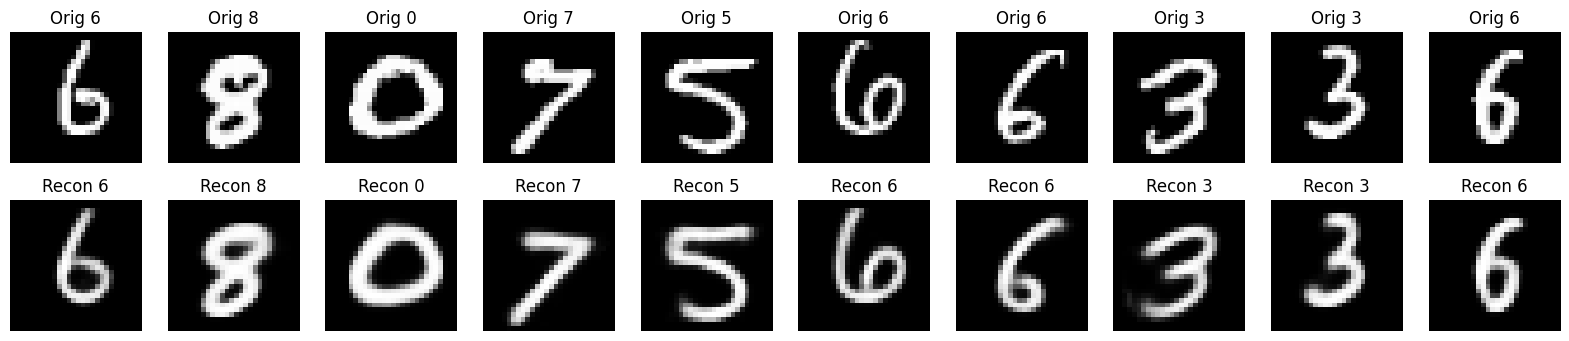


Epoch 32


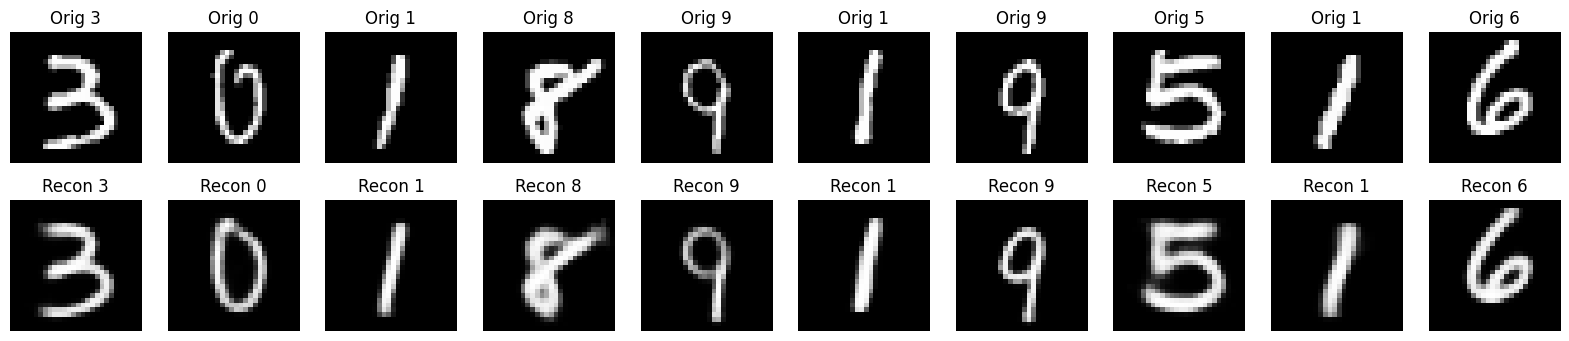


Epoch 33


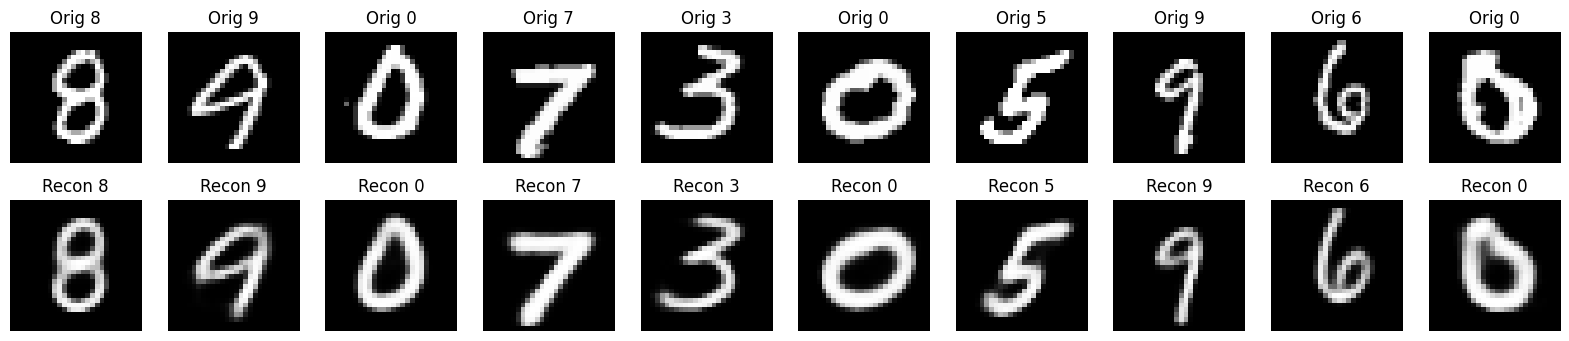


Epoch 34


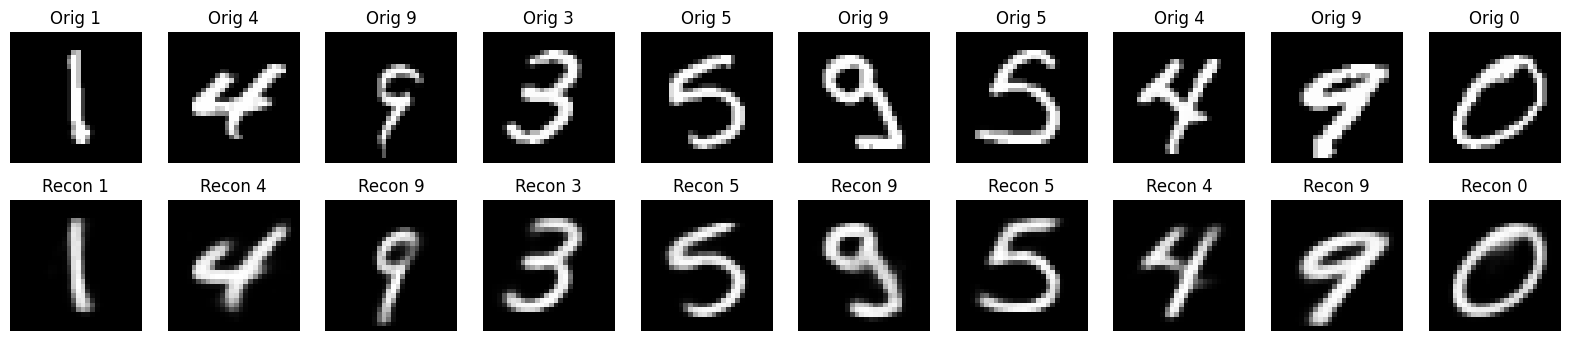


Epoch 35


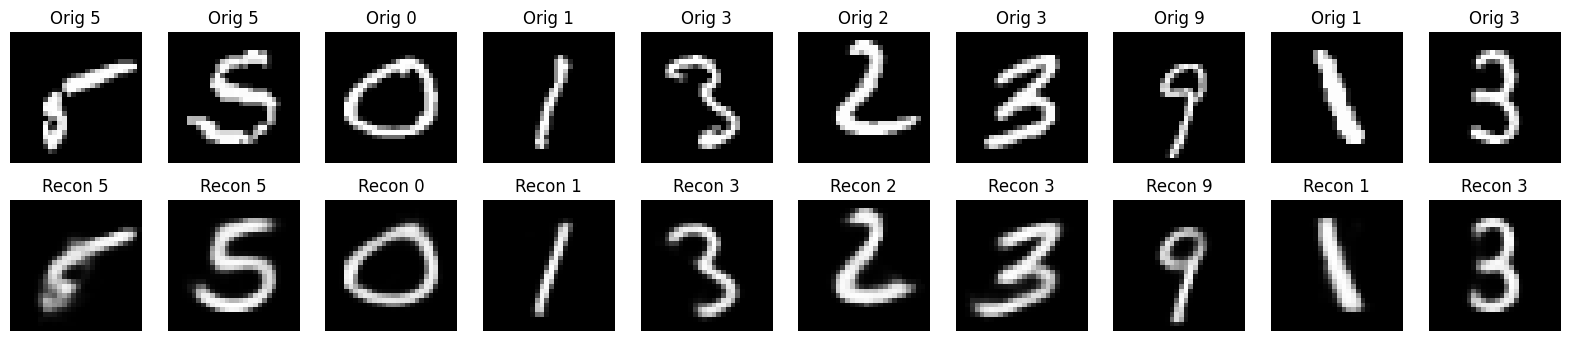


Epoch 36


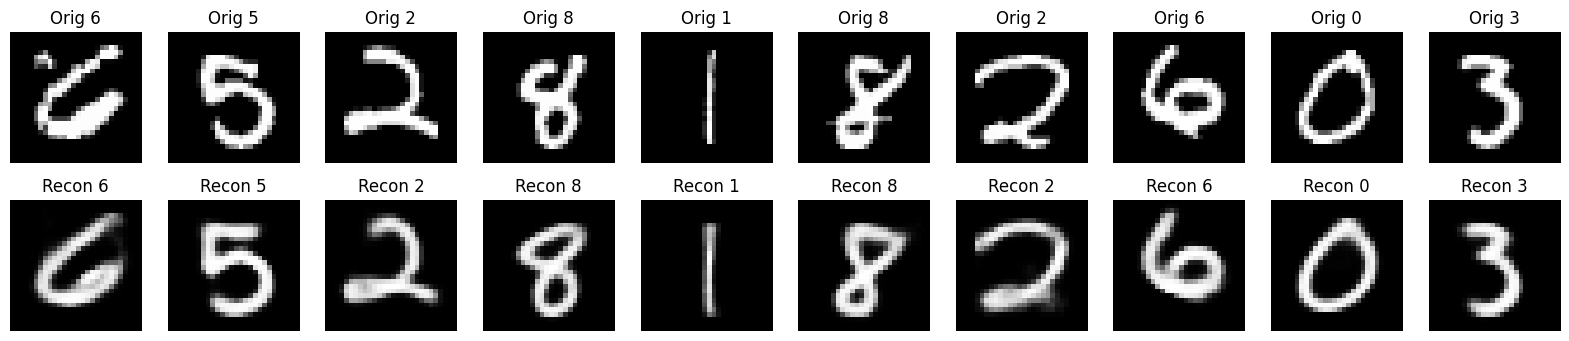


Epoch 37


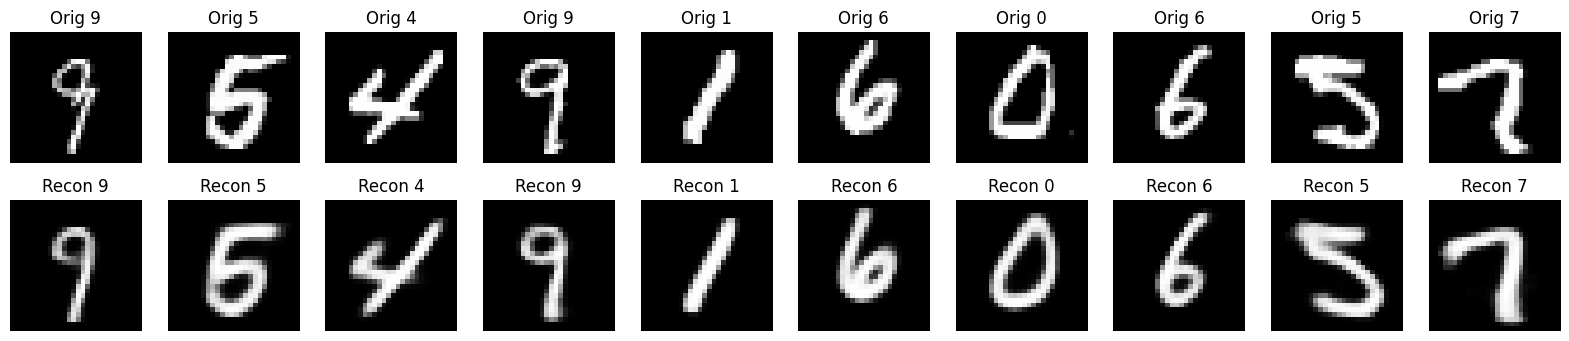


Epoch 38


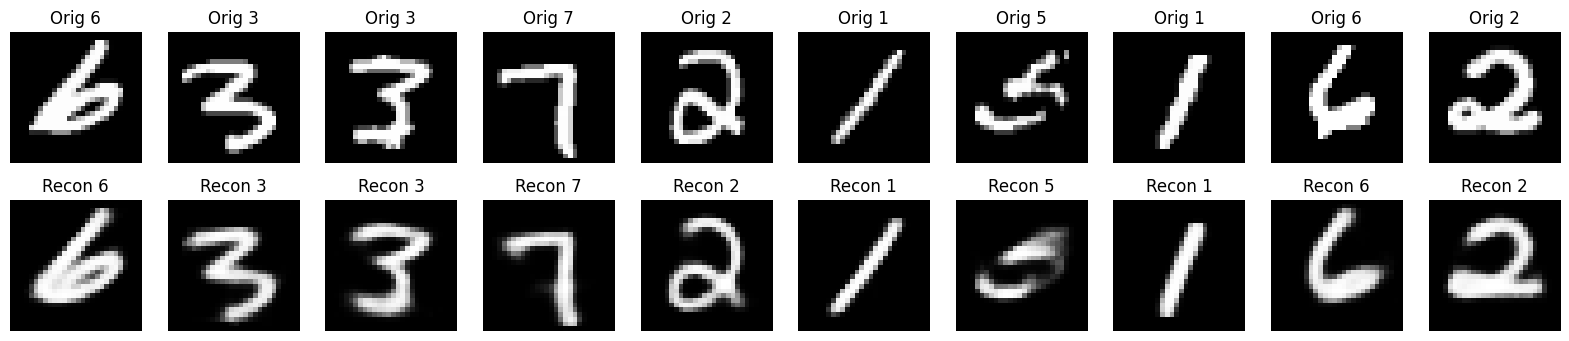


Epoch 39


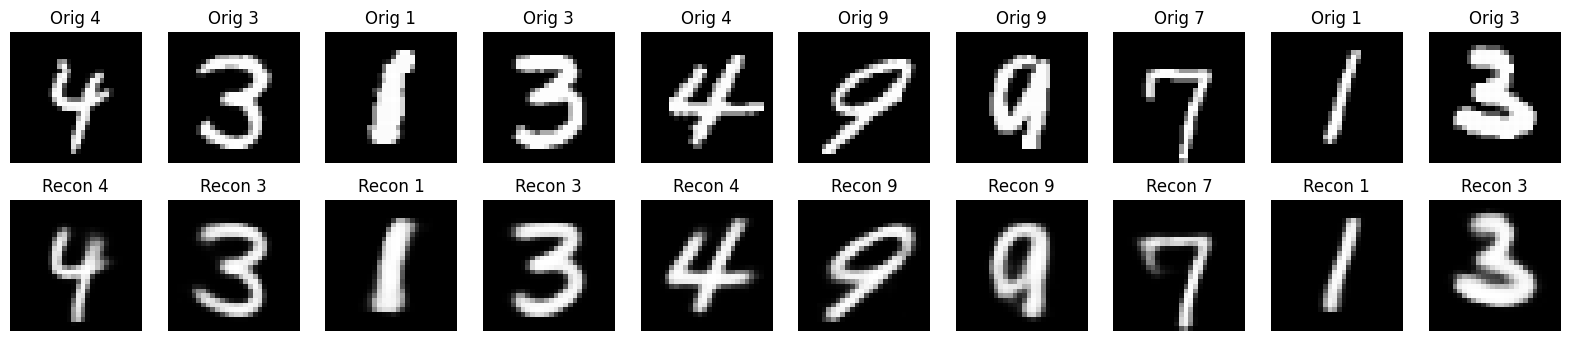


Epoch 40


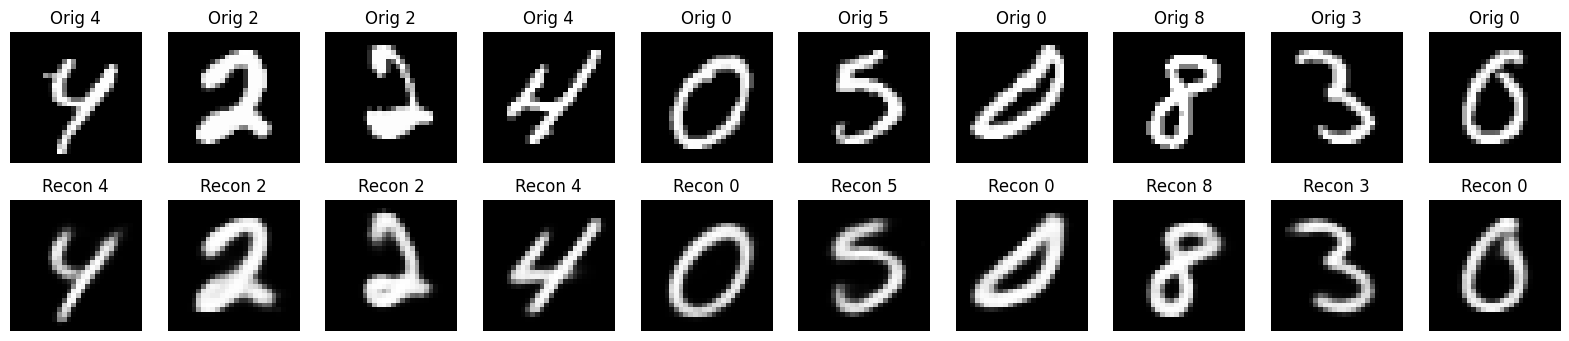


Epoch 41


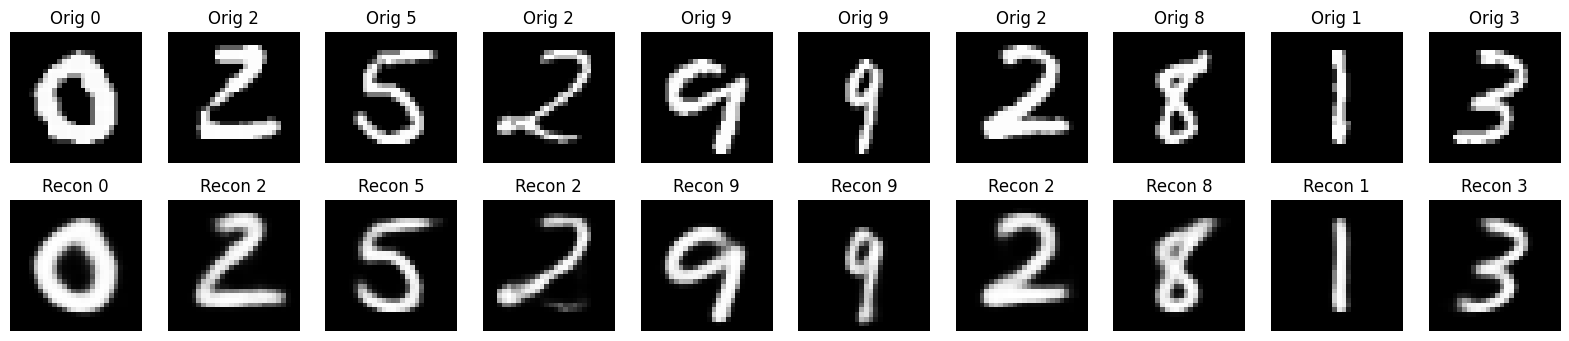


Epoch 42


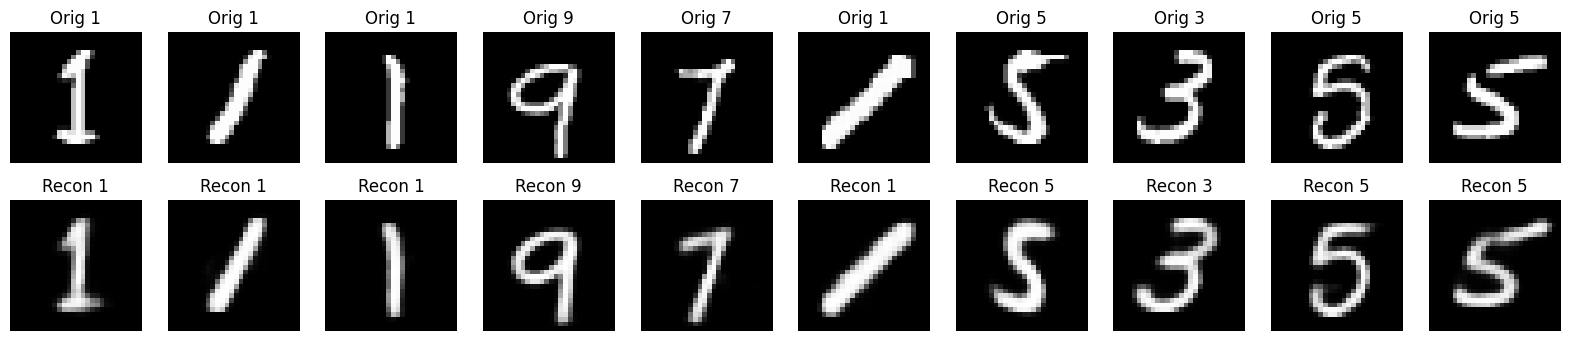


Epoch 43


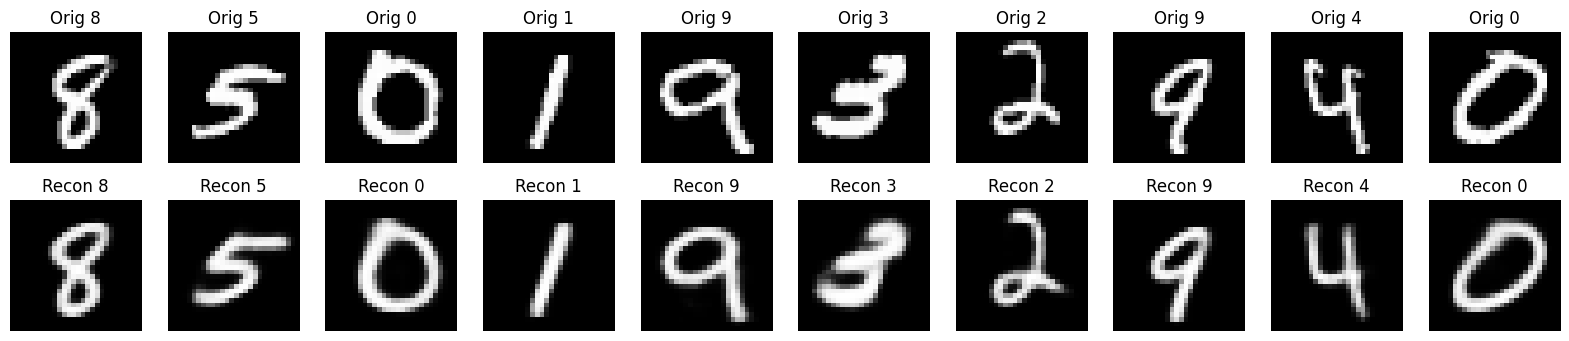


Epoch 44


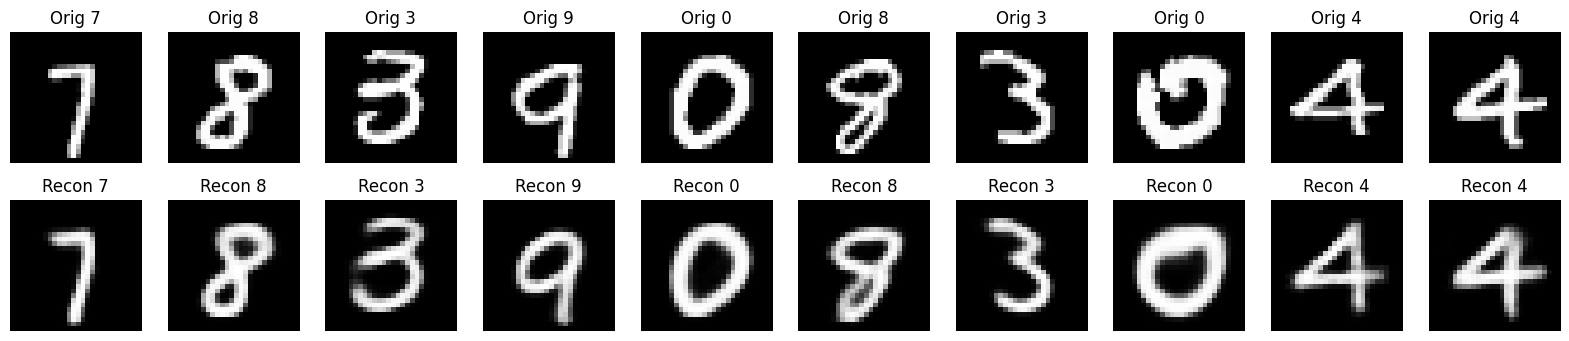


Epoch 45


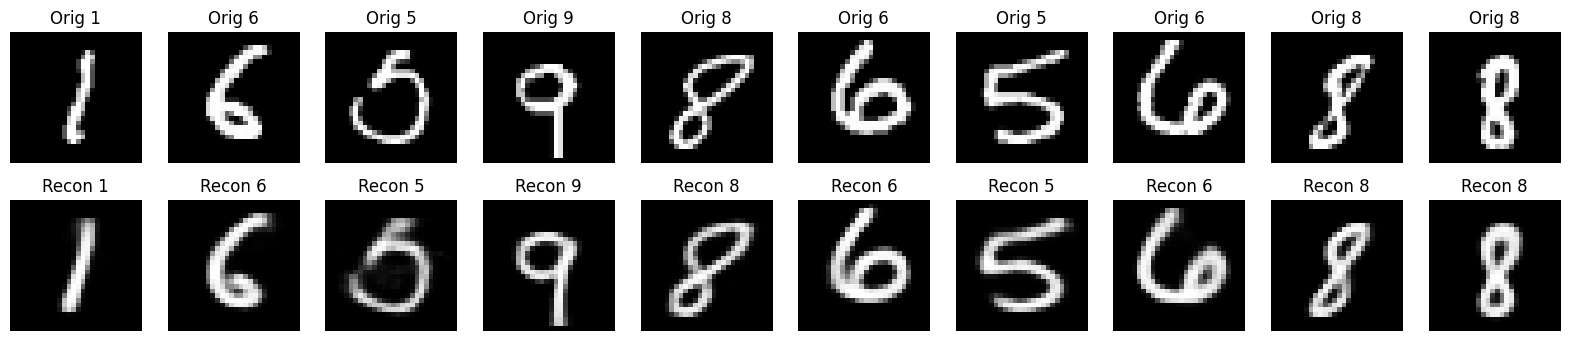


Epoch 46


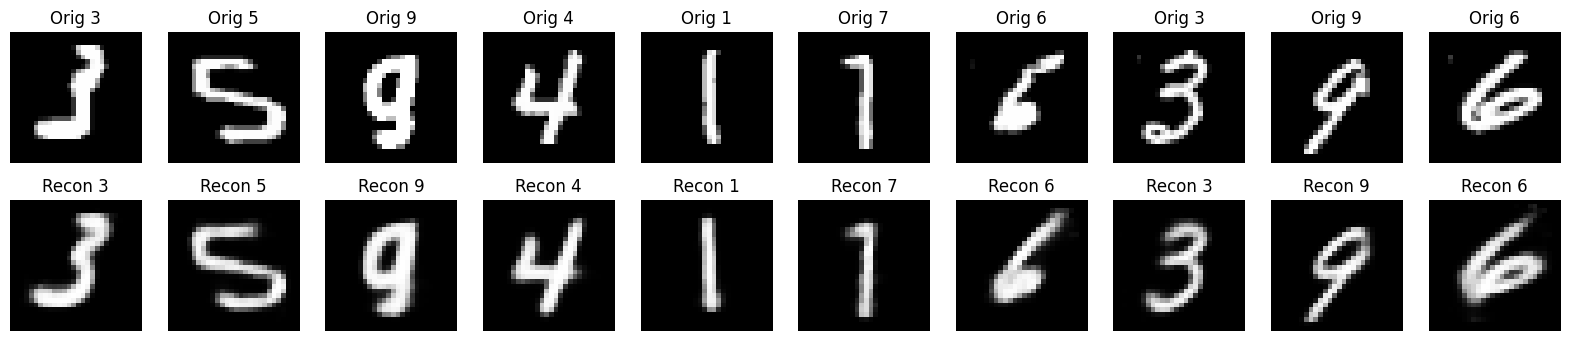


Epoch 47


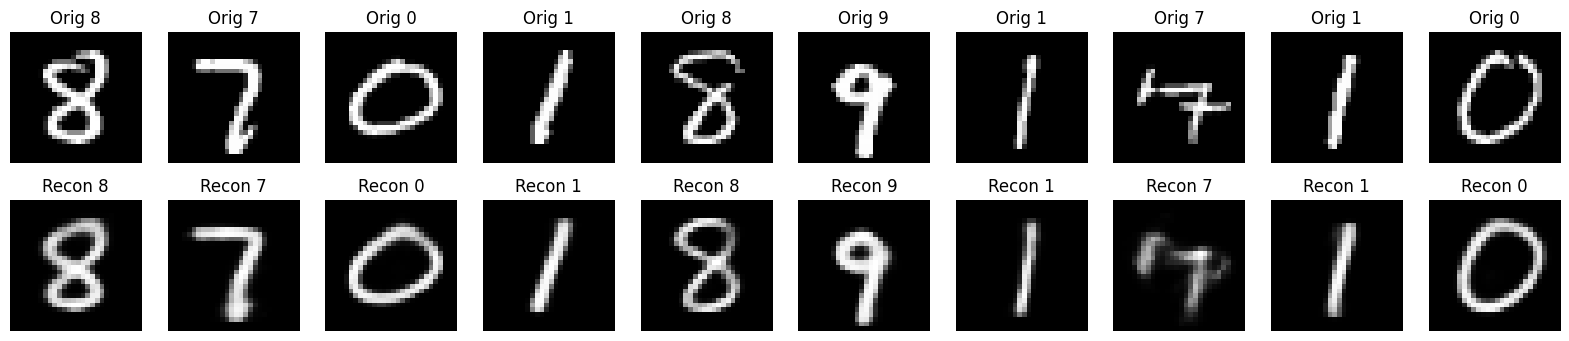


Epoch 48


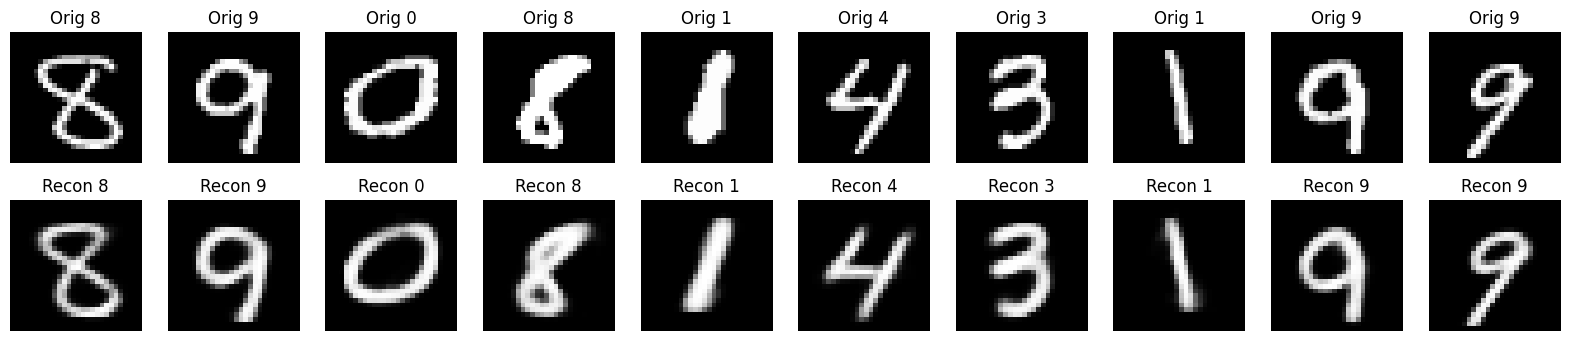


Epoch 49


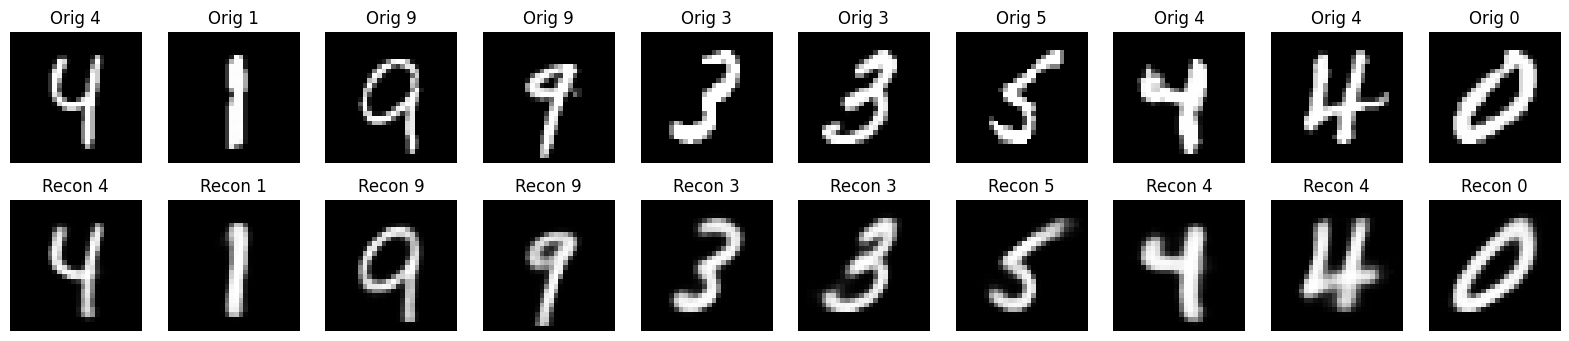

In [8]:
def train_model_conditional_bestparam(model, dataloader, device, epochs=10, beta=1):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    model.train()
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(dataloader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            recon_images, mu, log_var = model(images, labels)
            loss, mse_loss, kld_loss = vae_loss(recon_images, images, mu, log_var, beta=beta)
            loss.backward()
            optimizer.step()
        print(f"\nEpoch {epoch}")  # Display the epoch number clearly
        # Visualization at the end of each epoch
        with torch.no_grad():
            model.eval()
            sample_images, sample_labels = next(iter(dataloader))
            sample_images, sample_labels = sample_images.to(device), sample_labels.to(device)
            reconstructed, _, _ = model(sample_images[:10], sample_labels[:10])
            fig, axs = plt.subplots(2, 10, figsize=(20, 4))
            for k in range(10):
                axs[0, k].imshow(sample_images[k].squeeze().cpu().numpy().reshape(28, 28), cmap='gray')
                axs[0, k].axis('off')
                axs[0, k].set_title(f"Orig {sample_labels[k].item()}")
                axs[1, k].imshow(reconstructed[k].squeeze().cpu().numpy().reshape(28, 28), cmap='gray')
                axs[1, k].axis('off')
                axs[1, k].set_title(f"Recon {sample_labels[k].item()}")
            plt.show()
            model.train()
        scheduler.step()
def main():
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

beta_vae_conditional1 = ConditionalBetaVAE(z_dim=20, hidden_dim=1024, num_classes=10)
beta_vae_conditional1.to(device)
train_model_conditional_bestparam(beta_vae_conditional1, train_loader, device, epochs=50, beta=best_beta)


## t-SNE Visualization of Latent Representations

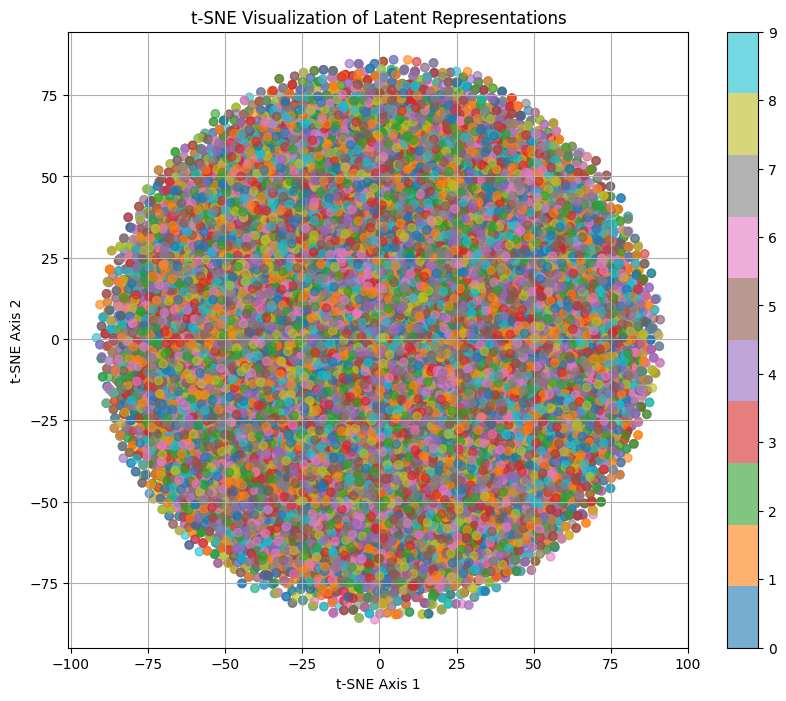

In [9]:
from sklearn.manifold import TSNE
import numpy as np

def extract_latent_representations(model, dataloader, device):
    model.eval()
    zs = []
    labels = []

    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            labels.extend(targets.numpy())
            # Assume the model has a method to just return the latent z
            mu, _ = model.encode(images, targets.to(device))
            z = model.reparameterize(mu, torch.zeros_like(mu))
            zs.append(z.cpu().numpy())

    zs = np.concatenate(zs, 0)
    labels = np.array(labels)
    return zs, labels

def visualize_latent_space(zs, labels):
    tsne = TSNE(n_components=2, random_state=123)
    zs_2d = tsne.fit_transform(zs)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(zs_2d[:, 0], zs_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, ticks=range(10))
    plt.title("t-SNE Visualization of Latent Representations")
    plt.xlabel("t-SNE Axis 1")
    plt.ylabel("t-SNE Axis 2")
    plt.grid(True)
    plt.show()

# Assuming device, train_loader as defined in previous context
zs, labels = extract_latent_representations(beta_vae_conditional, train_loader, device)
visualize_latent_space(zs, labels)

## PCA Visualization of Latent Representations

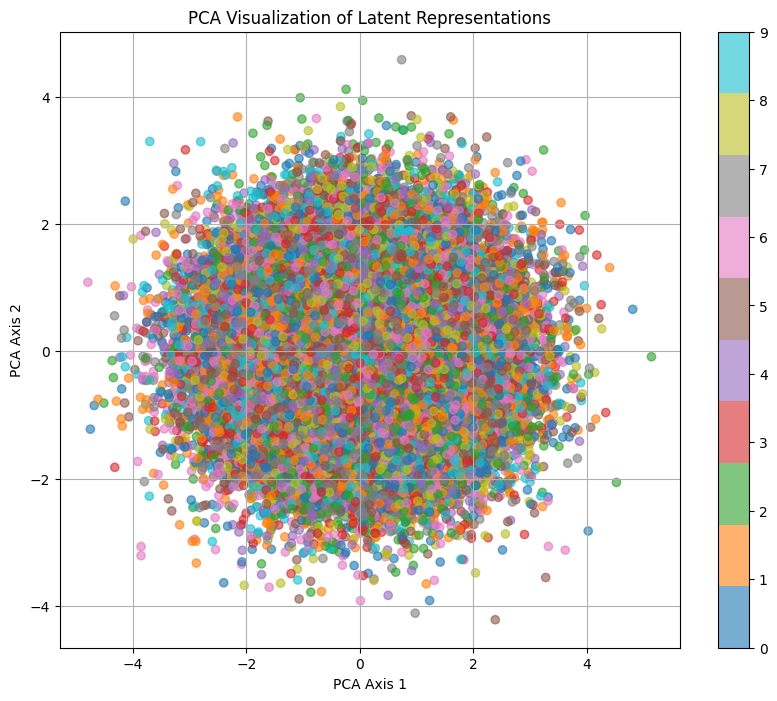

In [10]:
from sklearn.decomposition import PCA

def visualize_pca(zs, labels):
    pca = PCA(n_components=2)
    zs_pca = pca.fit_transform(zs)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(zs_pca[:, 0], zs_pca[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, ticks=range(10))
    plt.title("PCA Visualization of Latent Representations")
    plt.xlabel("PCA Axis 1")
    plt.ylabel("PCA Axis 2")
    plt.grid(True)
    plt.show()

visualize_pca(zs, labels)

## Results:

### Methodology Insights:
The method section provides a detailed approach for investigating the impact of the beta parameter in Conditional Beta-VAEs on digit image generation using the MNIST dataset. By systematically exploring different beta values, the study aims to discern the optimal balance between reconstruction loss and KL divergence, thereby enhancing the performance of generative models.

### Optimal Beta Parameter:
The analysis identifies the optimal beta parameter as **0.5**, indicating that this value achieves the best balance between reconstruction fidelity and latent space regularization.

### Performance Metrics at Epoch 50/50:
Upon training the model with the beta parameter set to 0.5, the following average metrics were observed:
- **Loss**: 2353.5313
- **MSE**: 1592.2137
- **KLD**: 1948.9573

### Visual Assessment:
Visualizations demonstrate the model's accuracy in reconstructing images from the MNIST dataset. The utilization of the Conditional Beta Variational Autoencoder yields improved performance compared to employing only the Beta Variational Autoencoder. However, it's noted that the model may require additional training when the dataset undergoes normalization and augmentation, such as rotations and transformations, to achieve optimal performance.

### Adaptive Model Training:
Adjusting the beta parameter enables sufficient accommodation and understanding of the model's training dynamics based on the provided data. This adaptability enhances the model's capability to handle various input data types in diverse scenarios.

### Latent Space Analysis:
Visual examination of the latent space through techniques like t-SNE and PCA reveals well-packed clusters with labels evenly distributed. This insight facilitates a deeper understanding of the dataset's structure and aids in designing a model capable of self-training and generating reconstructed images closely resembling the originals.
